# IST 652 Final Project - Pokemon
Bing-je Wu, Maggie Southwick

* Outline 
    + Load the dataset
    + Explore the datasets
        1. Pokemon dataset
            + Renames column names
            + Dealing with missing values
            + Data types conversion
            + Add new features
        2. PokemonGo dataset
            + Renames column names
            + Dealing with missing values
            + Data types conversion
            + Add new features
            + Merge datasets
        3. Pokemon Moves dataset
            + Renames column names
            + Dealing with missing values
            + Data types conversion
        4. Pokemon Tweets dataset
            + Select features
            + Filter results
            + Join to Pokemon dataset and prepare for analysis
    + Research questions

In this project, we are going to use three csv files and one JSON file from different data source. The first dataset, main dataset, is from the kaggle, https://www.kaggle.com/abcsds/Pokémon. The second dataset is PokemonGO dataset from pokemon database, https://pokemondb.net/go/pokedex. The third dataset is Pokemon moves dataset from the pokemon database as well, https://pokemondb.net/move. The fourth dataset is Tweets that contain Pokemon names, collected from Twitter. We are going to utilize those four datasets to perform our research questions and analysis.

## Load the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# magic command
%matplotlib inline    
import seaborn as sns
import statistics
# regular expression for str manipulation
import re 
# work with json formatted files
import json

In [2]:
df = pd.read_csv('Pokemon.csv')
# print confirmation
print('Read', len(df), 'records from Pokemon csv file.')

Read 800 records from Pokemon csv file.


In [3]:
go = pd.read_csv('pokemonGo_list.csv')
# print confirmation
print('Read', len(go), 'records from Pokemon Go csv file.')

Read 570 records from Pokemon Go csv file.


In [4]:
moves = pd.read_csv('pokemon_moves.csv')
# print confirmation
print('Read', len(moves), 'records from Pokemon moves csv file.')

Read 804 records from Pokemon moves csv file.


In [5]:
with open('pokemon_tweets.json', 'r', encoding='utf8') as jfile:
    tweets = json.load(jfile)
# print confirmation
print('Read', len(tweets), 'records from JSON file.')

Read 613 records from JSON file.


## Explore the data set

In [6]:
# Set the option to see all the columns on jupyter notebook
# https://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows=999

### - Pokemon Dataset -

#### 1. Renames column names
Some column names have blanks and some have periods. In order to avoid problems when we do subset, we need to change those column names.

In [7]:
df.rename(columns={'Type 1':'Type1',
                   'Type 2':'Type2',
                   'Sp. Atk':'Sp_Atk',
                   'Sp. Def':'Sp_Def',}, inplace=True)

In [8]:
print('Summary of the basic information about this DataFrame and its data: \n')
df.info()

Summary of the basic information about this DataFrame and its data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type1         800 non-null object
Type2         414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp_Atk        800 non-null int64
Sp_Def        800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


From the summary of the data set above, we have noticed that there are missing values existing in the data set, specifically in the "Type2" column. 

In [9]:
print('Basic statistics about this DataFrame and its data:')
df.describe()

Basic statistics about this DataFrame and its data:


,#,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### 2. Dealing with missing values
There are 386 missing values on Type2 column. The Type2 column provides the infomation of second type.   
Some pokemons have dual types, and some are not. Thus, create a new category, 'no value', to replace the missing value.

In [10]:
# create a dictionary for filling na values
fill_na = {'Type2':'No value'} 
# assign the the dictionary to replace missing values
df=df.fillna(value=fill_na)
# Check to see if missing values have been resolved
df.isnull().sum()

#             0
Name          0
Type1         0
Type2         0
Total         0
HP            0
Attack        0
Defense       0
Sp_Atk        0
Sp_Def        0
Speed         0
Generation    0
Legendary     0
dtype: int64

#### 3. Data types conversion
There are bool variable and nominal variable need to be converted.  
Convert columns, Generation and Legendary, to str type. 
Use astype() to convert data type with a dictionary as input.  
Reference: https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas

In [11]:
df = df.astype({"Generation": str, "Legendary": str})
# Check data type are inplace
df.dtypes

#              int64
Name          object
Type1         object
Type2         object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp_Atk         int64
Sp_Def         int64
Speed          int64
Generation    object
Legendary     object
dtype: object

In [12]:
df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,No value,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,No value,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,No value,314,44,48,65,50,64,43,1,False


#### 4. Add new features

Since the data set provides extra information for those pokemon has two types, we want to add a new column for showing the information.  
Reference: https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column

In [13]:
## Quantify 'Type' columns information
# Create a condition list
conditions = [(df.Type2 == 'No value'),
              (df.Type2 != 'No value')]
# Create a choice list
choices=['1','2']
# Set up the default choice, feed in the parameters
df['Types']=np.select(condlist=conditions, choicelist=choices, default=['2'])

# --  alternative -- 
#df['Types']=['1' if x=='No value' else '2' for x in df['Type2']]  

Some pokemon have "mega" in their name, which indicates that they are in an evolved state for a limited amount of time.  
We will add a column to identify these pokemon.
source: https://bulbapedia.bulbagarden.net/wiki/Mega_Evolution

In [14]:
# create a condition list
conditions = [(df.Name.str.contains('Mega')),
              # subset the Name column and use str.contains to find the match record
              (df.Name.str.contains('Mega')==False)]

# create a choice list
choices = ['True', 'False']

# set up the default choice, feed in the parameters
df['Mega']=np.select(condlist=conditions, choicelist = choices, default=['False'])

# --  alternative -- 
#df['Mega']=['True' if x==True else 'False' for x in df['Name'].str.contains('Mega')]  

Calculate the total attack values and total defense value for comparison

In [15]:
df['Total_Atk'] = df.Attack + df.Sp_Atk
df['Total_Def'] = df.Defense + df.Sp_Def

In [16]:
# Reorder the columns
df=df[['#','Name', 'Types', 'Type1', 'Type2', 'Total', 'Total_Atk', 'Total_Def', 'HP', 'Attack', 
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary','Mega']]
# Quick look of the cleansed dataset
df.head(10)

,#,Name,Types,Type1,Type2,Total,Total_Atk,Total_Def,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Mega
0,1,Bulbasaur,2,Grass,Poison,318,114,114,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,2,Grass,Poison,405,142,143,60,62,63,80,80,60,1,False,False
2,3,Venusaur,2,Grass,Poison,525,182,183,80,82,83,100,100,80,1,False,False
3,3,VenusaurMega Venusaur,2,Grass,Poison,625,222,243,80,100,123,122,120,80,1,False,True
4,4,Charmander,1,Fire,No value,309,112,93,39,52,43,60,50,65,1,False,False
5,5,Charmeleon,1,Fire,No value,405,144,123,58,64,58,80,65,80,1,False,False
6,6,Charizard,2,Fire,Flying,534,193,163,78,84,78,109,85,100,1,False,False
7,6,CharizardMega Charizard X,2,Fire,Dragon,634,260,196,78,130,111,130,85,100,1,False,True
8,6,CharizardMega Charizard Y,2,Fire,Flying,634,263,193,78,104,78,159,115,100,1,False,True
9,7,Squirtle,1,Water,No value,314,98,129,44,48,65,50,64,43,1,False,False


### - PokemonGo Dataset -
Explore the pokemongo dataset and perform some data cleansing process such as resolving missing data, formatting issue, erroneous values, anomalies...etc

In [17]:
go.describe()

,Unnamed: 0,#,Attack,Defense,HP,Candy
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,284.500000,269.628070,167.019298,157.628070,140.285965,28.284211
std,164.689101,165.194656,46.723860,56.808734,51.286548,45.801128
min,0.000000,1.000000,1.000000,17.000000,32.000000,0.000000
25%,142.250000,125.250000,137.000000,117.000000,98.000000,0.000000
50%,284.500000,266.500000,163.000000,156.000000,136.500000,0.000000
75%,426.750000,403.750000,190.000000,197.750000,175.000000,50.000000
max,569.000000,809.000000,496.000000,414.000000,396.000000,400.000000


In [18]:
go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 12 columns):
Unnamed: 0      570 non-null int64
#               570 non-null int64
Name            570 non-null object
Type            570 non-null object
Attack          570 non-null int64
Defense         570 non-null int64
HP              570 non-null int64
Catch_Rate      570 non-null object
Flee_Rate       570 non-null object
Candy           570 non-null int64
Fast_Moves      568 non-null object
Charge_Moves    568 non-null object
dtypes: int64(6), object(6)
memory usage: 53.6+ KB


From the summary of the data set above, we have noticed that there are missing values existing in the data set, specifically in the "Fast_Moves" column and "Charge_Moves" column. 

#### 1. Renames column names
The first unnamed column is redundant index column. We should remove the column
The # column is pokemon index number. To differentiate some of columns from the main dataset, we need to rename 'Type', 'Attack', 'Defense', 'HP'...etc

In [19]:
# drop the first redundant column
go=go.drop(['Unnamed: 0'],axis=1)

In [20]:
go.rename(columns={'Type':'Go_Type',
                   'Attack':'Go_Atk',
                   'Defense':'Go_Def',
                   'HP':'Go_HP',}, inplace=True)

#### 2. Dealing with missing values

There are two records have missing values. We need to check what are those records and make a decision on how to deal with the missing values.

In [21]:
go[go['Fast_Moves'].isnull()]

,#,Name,Go_Type,Go_Atk,Go_Def,Go_HP,Catch_Rate,Flee_Rate,Candy,Fast_Moves,Charge_Moves
251,233,Porygon2,['Normal'],198,198,180,5%,5%,100,NaN,NaN
253,235,Smeargle,['Normal'],146,40,83,25%,7%,0,NaN,NaN


There are two pokemons do not have Fast moves and charge moves. We decide to keep the records and fill the NA with 'No value'

In [22]:
fill_na = {'Fast_Moves':'No Value', 'Charge_Moves':'No Value'} # create a dictionary for filling na values
go=go.fillna(value=fill_na)

In [23]:
# Check if there is a missing value
go.isnull().sum()

#               0
Name            0
Go_Type         0
Go_Atk          0
Go_Def          0
Go_HP           0
Catch_Rate      0
Flee_Rate       0
Candy           0
Fast_Moves      0
Charge_Moves    0
dtype: int64

#### 3. Data types conversion
To convert 'Catch_Rate' and 'Flee_Rate' to int, we need to remove the '%' sign in the cell.
A '—' value should be replaced with 0.

In [24]:
# https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column
go['Catch_Rate'].replace(regex=True,inplace=True,to_replace='%',value='')
go['Catch_Rate'].replace(regex=True,inplace=True,to_replace='—',value='0')
go['Flee_Rate'].replace(regex=True,inplace=True,to_replace='%',value='')

In [25]:
go = go.astype({'Catch_Rate': float, 'Flee_Rate': float})

In [26]:
# Check data type
go.dtypes

#                 int64
Name             object
Go_Type          object
Go_Atk            int64
Go_Def            int64
Go_HP             int64
Catch_Rate      float64
Flee_Rate       float64
Candy             int64
Fast_Moves       object
Charge_Moves     object
dtype: object

#### 4. Add new features
Since the data set provides extra information for those pokemon has different moves, we quantify the information.  
Also, to answer the research question, we want to add all the   
Reference: https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column

In [27]:
# Add 'Go_Total' column to get the total power
go['Go_Total']=go['Go_Atk']+go['Go_Def']+go['Go_HP']

In [28]:
## Quantify 'Fast_Moves' column
# Create a empty list for 'Fast_Moves_No' column
Fast_Moves_No=[]
# forloop the 'Fast_Moves' column to quantify the information
for i,l in enumerate(go['Fast_Moves']):
    # use regular expression to fill all desired strings to a list
    pattern = re.compile(r"[A-Za-z]+\s?[A-Za-z]+")
    templist = re.findall(pattern, l)
    # count the number of element of the temp list to get the number of moves for each pokemon
    numbers =len(templist)
    # append the number of moves to the 'Fast_Moves_No' list
    Fast_Moves_No.append(numbers)
print(f'{i+1} of records has been updataed !')
# assign 'Fast_Moves_No' list to 'Fast_Moves_No' column
go['Fast_Moves_No'] = Fast_Moves_No

570 of records has been updataed !


In [29]:
## Missing values were filled inproperly
go.loc[go.Charge_Moves=='No Value']

,#,Name,Go_Type,Go_Atk,Go_Def,Go_HP,Catch_Rate,Flee_Rate,Candy,Fast_Moves,Charge_Moves,Go_Total,Fast_Moves_No
251,233,Porygon2,['Normal'],198,198,180,5.0,5.0,100,No Value,No Value,576,1
253,235,Smeargle,['Normal'],146,40,83,25.0,7.0,0,No Value,No Value,269,1


In [30]:
## Adjust the missing values
# chained indexing will produced multiple veiws and it may cuase warning when assign a value to chained index
# use .loc to assing a value to avoid warning in chained indexing
go.loc[go.Fast_Moves=='No Value','Fast_Moves_No']=0 # locate the cells that the row is True and is under 'Fast_Moves_No' column
go.loc[go.Fast_Moves=='No Value']

,#,Name,Go_Type,Go_Atk,Go_Def,Go_HP,Catch_Rate,Flee_Rate,Candy,Fast_Moves,Charge_Moves,Go_Total,Fast_Moves_No
251,233,Porygon2,['Normal'],198,198,180,5.0,5.0,100,No Value,No Value,576,0
253,235,Smeargle,['Normal'],146,40,83,25.0,7.0,0,No Value,No Value,269,0


In [31]:
## Quantify 'Charge_Moves' column
# Create a empty list for 'Charge_Moves_No' column
Charge_Moves_No=[]
# forloop the 'Charge_Moves' column to quantify the information
for i,l in enumerate(go['Charge_Moves']):
    # use regular expression to fill all desired strings to a list
    pattern = re.compile(r"[A-Za-z]+\s?[A-Za-z]+")
    templist = re.findall(pattern, l)
    # count the number of element of the temp list to get the number of moves for each pokemon
    numbers =len(templist)
    # append the number of moves to the 'Charge_Moves_No' list
    Charge_Moves_No.append(numbers)
print(f'{i+1} of records has been updataed !')
# assign 'Charge_Moves_No' list to 'Charge_Moves_No' column
go['Charge_Moves_No'] = Charge_Moves_No

570 of records has been updataed !


In [32]:
## Missing values were filled inproperly
go.loc[go.Charge_Moves=='No Value']

,#,Name,Go_Type,Go_Atk,Go_Def,Go_HP,Catch_Rate,Flee_Rate,Candy,Fast_Moves,Charge_Moves,Go_Total,Fast_Moves_No,Charge_Moves_No
251,233,Porygon2,['Normal'],198,198,180,5.0,5.0,100,No Value,No Value,576,0,1
253,235,Smeargle,['Normal'],146,40,83,25.0,7.0,0,No Value,No Value,269,0,1


In [33]:
## Adjust the missing values
# chained indexing will produced multiple veiws and it may cuase warning when assign a value to chained index
# use .loc to assing a value to avoid warning in chained indexing
go.loc[go.Charge_Moves=='No Value','Charge_Moves_No']=0 # locate the cells that the row is True and is under 'Fast_Moves_No' column
go.loc[go.Charge_Moves=='No Value']

,#,Name,Go_Type,Go_Atk,Go_Def,Go_HP,Catch_Rate,Flee_Rate,Candy,Fast_Moves,Charge_Moves,Go_Total,Fast_Moves_No,Charge_Moves_No
251,233,Porygon2,['Normal'],198,198,180,5.0,5.0,100,No Value,No Value,576,0,0
253,235,Smeargle,['Normal'],146,40,83,25.0,7.0,0,No Value,No Value,269,0,0


In [34]:
## Quantify 'Go_Type' column
# Create a empty list for 'Go_Types' column
Go_Types=[]
# forloop the 'Go_Type' column to quantify the information
for i,l in enumerate(go['Go_Type']):
    # use regular expression to fill all desired strings to a list
    pattern = re.compile(r"[A-Za-z]+\s?[A-Za-z]+")
    templist = re.findall(pattern, l)
    # count the number of element of the temp list to get the number of moves for each pokemon
    numbers =len(templist)
    # append the number to the 'Go_Types' list
    Go_Types.append(numbers)
print(f'{i+1} of records has been updataed !')
# assign 'Go_Types' list to 'Go_Types' column
go['Go_Types'] = Go_Types

570 of records has been updataed !


In [35]:
# Reorder the columns
go=go[['#','Name', 'Go_Types', 'Go_Type', 'Go_Total', 'Go_Atk', 'Go_Def', 'Go_HP', 'Catch_Rate', 'Flee_Rate',
   'Candy', 'Fast_Moves_No', 'Fast_Moves', 'Charge_Moves_No', 'Charge_Moves']]
# Quick look of the cleansed dataset
go.head(10)

,#,Name,Go_Types,Go_Type,Go_Total,Go_Atk,Go_Def,Go_HP,Catch_Rate,Flee_Rate,Candy,Fast_Moves_No,Fast_Moves,Charge_Moves_No,Charge_Moves
0,1,Bulbasaur,2,"['Grass', 'Poison']",357,128,118,111,20.0,10.0,25,2,"['Vine Whip', 'Tackle']",3,"['Seed Bomb', 'Sludge Bomb', 'Power Whip']"
1,2,Ivysaur,2,"['Grass', 'Poison']",449,155,151,143,10.0,7.0,100,2,"['Vine Whip', 'Razor Leaf']",3,"['Sludge Bomb', 'Solar Beam', 'Power Whip']"
2,3,Venusaur,2,"['Grass', 'Poison']",577,190,198,189,5.0,5.0,0,2,"['Vine Whip', 'Razor Leaf']",3,"['Petal Blizzard', 'Sludge Bomb', 'Solar Beam']"
3,4,Charmander,1,['Fire'],327,118,116,93,20.0,10.0,25,2,"['Ember', 'Scratch']",3,"['Flamethrower', 'Flame Charge', 'Flame Burst']"
4,5,Charmeleon,1,['Fire'],435,151,158,126,10.0,7.0,100,2,"['Ember', 'Fire Fang']",3,"['Flamethrower', 'Flame Burst', 'Fire Punch']"
5,6,Charizard,2,"['Fire', 'Flying']",582,186,223,173,5.0,5.0,0,2,"['Air Slash', 'Fire Spin']",3,"['Dragon Claw', 'Fire Blast', 'Overheat']"
6,7,Squirtle,1,['Water'],342,127,94,121,20.0,10.0,25,2,"['Tackle', 'Bubble']",3,"['Aqua Jet', 'Aqua Tail', 'Water Pulse']"
7,8,Wartortle,1,['Water'],434,153,126,155,10.0,7.0,100,2,"['Bite', 'Water Gun']",3,"['Ice Beam', 'Aqua Jet', 'Hydro Pump']"
8,9,Blastoise,1,['Water'],566,188,171,207,5.0,5.0,0,2,"['Bite', 'Water Gun']",4,"['Flash Cannon', 'Ice Beam', 'Hydro Pump', 'Sk..."
9,10,Caterpie,1,['Bug'],238,128,55,55,50.0,20.0,12,2,"['Bug Bite', 'Tackle']",1,['Struggle']


#### 5. Merge datasets

Since we want to compare two platform of pokemon status, we use inner join and to compare pokemons exist in both two platforms. The condition of join is based on the index number column, '#', and pokemon name column, 'Name'.  
Reference:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html  
https://datacarpentry.org/python-ecology-lesson/05-merging-data/  

In [36]:
dfm = df.merge(go, left_on=['#','Name'], right_on=['#','Name'], suffixes=('_left', '_right'))
dfm

,#,Name,Types,Type1,Type2,Total,Total_Atk,Total_Def,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Mega,Go_Types,Go_Type,Go_Total,Go_Atk,Go_Def,Go_HP,Catch_Rate,Flee_Rate,Candy,Fast_Moves_No,Fast_Moves,Charge_Moves_No,Charge_Moves
0,1,Bulbasaur,2,Grass,Poison,318,114,114,45,49,49,65,65,45,1,False,False,2,"['Grass', 'Poison']",357,128,118,111,20.0,10.0,25,2,"['Vine Whip', 'Tackle']",3,"['Seed Bomb', 'Sludge Bomb', 'Power Whip']"
1,2,Ivysaur,2,Grass,Poison,405,142,143,60,62,63,80,80,60,1,False,False,2,"['Grass', 'Poison']",449,155,151,143,10.0,7.0,100,2,"['Vine Whip', 'Razor Leaf']",3,"['Sludge Bomb', 'Solar Beam', 'Power Whip']"
2,3,Venusaur,2,Grass,Poison,525,182,183,80,82,83,100,100,80,1,False,False,2,"['Grass', 'Poison']",577,190,198,189,5.0,5.0,0,2,"['Vine Whip', 'Razor Leaf']",3,"['Petal Blizzard', 'Sludge Bomb', 'Solar Beam']"
3,4,Charmander,1,Fire,No value,309,112,93,39,52,43,60,50,65,1,False,False,1,['Fire'],327,118,116,93,20.0,10.0,25,2,"['Ember', 'Scratch']",3,"['Flamethrower', 'Flame Charge', 'Flame Burst']"
4,5,Charmeleon,1,Fire,No value,405,144,123,58,64,58,80,65,80,1,False,False,1,['Fire'],435,151,158,126,10.0,7.0,100,2,"['Ember', 'Fire Fang']",3,"['Flamethrower', 'Flame Burst', 'Fire Punch']"
5,6,Charizard,2,Fire,Flying,534,193,163,78,84,78,109,85,100,1,False,False,2,"['Fire', 'Flying']",582,186,223,173,5.0,5.0,0,2,"['Air Slash', 'Fire Spin']",3,"['Dragon Claw', 'Fire Blast', 'Overheat']"
6,7,Squirtle,1,Water,No value,314,98,129,44,48,65,50,64,43,1,False,False,1,['Water'],342,127,94,121,20.0,10.0,25,2,"['Tackle', 'Bubble']",3,"['Aqua Jet', 'Aqua Tail', 'Water Pulse']"
7,8,Wartortle,1,Water,No value,405,128,160,59,63,80,65,80,58,1,False,False,1,['Water'],434,153,126,155,10.0,7.0,100,2,"['Bite', 'Water Gun']",3,"['Ice Beam', 'Aqua Jet', 'Hydro Pump']"
8,9,Blastoise,1,Water,No value,530,168,205,79,83,100,85,105,78,1,False,False,1,['Water'],566,188,171,207,5.0,5.0,0,2,"['Bite', 'Water Gun']",4,"['Flash Cannon', 'Ice Beam', 'Hydro Pump', 'Sk..."
9,10,Caterpie,1,Bug,No value,195,50,55,45,30,35,20,20,45,1,False,False,1,['Bug'],238,128,55,55,50.0,20.0,12,2,"['Bug Bite', 'Tackle']",1,['Struggle']


### - Pokemon Moves Dataset -

In [37]:
moves.describe()

,Name,Type,Cat.,Power,Acc.,PP,TM,Effect,Prob. (%)
count,804,804,63,804,804,804,100,773,627
unique,804,18,1,36,12,11,100,512,8
top,Techno Blast,Normal,—,—,100,10,TM32,May cause flinching.,—
freq,1,189,63,354,365,226,1,20,479


In [38]:
moves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 9 columns):
Name         804 non-null object
Type         804 non-null object
Cat.         63 non-null object
Power        804 non-null object
Acc.         804 non-null object
PP           804 non-null object
TM           100 non-null object
Effect       773 non-null object
Prob. (%)    627 non-null object
dtypes: object(9)
memory usage: 56.7+ KB


#### 1. Renames column names

In [39]:
## Rename columns for ease of reference
moves=moves.rename(
    columns = {
        "Name":"Move", 
        "Acc.":"Accuracy", 
        "TM":"TechMachine", 
        "Prob. (%)":"Prob"})
moves

,Move,Type,Cat.,Power,Accuracy,PP,TechMachine,Effect,Prob
0,"10,000,000 Volt Thunderbolt",Electric,NaN,195,—,1,NaN,Pikachu-exclusive Z-Move.,NaN
1,Absorb,Grass,NaN,20,100,25,NaN,User recovers half the HP inflicted on opponent.,—
2,Accelerock,Rock,NaN,40,100,20,NaN,User attacks first.,NaN
3,Acid,Poison,NaN,40,100,30,NaN,May lower opponent's Special Defense.,10
4,Acid Armor,Poison,NaN,—,—,20,NaN,Sharply raises user's Defense.,—
5,Acid Downpour,Poison,—,—,—,1,NaN,Poison type Z-Move.,NaN
6,Acid Spray,Poison,NaN,40,100,20,NaN,Sharply lowers opponent's Special Defense.,100
7,Acrobatics,Flying,NaN,55,100,15,TM62,Stronger when the user does not have a held item.,—
8,Acupressure,Normal,NaN,—,—,30,NaN,Sharply raises a random stat.,—
9,Aerial Ace,Flying,NaN,60,∞,20,TM40,Ignores Accuracy and Evasiveness.,—


#### 2. Dealing with missing values

In [40]:
## Category column did not read in correctly. 
# Tried to read in alt text of image but I just could not make it happen :( 
# Remove it from analysis since it is not needed to answer research question.
moves=moves.drop('Cat.', axis=1)
moves.head()

,Move,Type,Power,Accuracy,PP,TechMachine,Effect,Prob
0,"10,000,000 Volt Thunderbolt",Electric,195,—,1,NaN,Pikachu-exclusive Z-Move.,NaN
1,Absorb,Grass,20,100,25,NaN,User recovers half the HP inflicted on opponent.,—
2,Accelerock,Rock,40,100,20,NaN,User attacks first.,NaN
3,Acid,Poison,40,100,30,NaN,May lower opponent's Special Defense.,10
4,Acid Armor,Poison,—,—,20,NaN,Sharply raises user's Defense.,—


In [41]:
# replace all instances of '—' in Power, Accuracy and PP with zero
moves = moves.replace({'Power':'—', 'Accuracy':'—', 'PP':'—'},0)
print(moves.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 8 columns):
Move           804 non-null object
Type           804 non-null object
Power          804 non-null object
Accuracy       804 non-null object
PP             804 non-null object
TechMachine    100 non-null object
Effect         773 non-null object
Prob           627 non-null object
dtypes: object(8)
memory usage: 50.4+ KB
None


#### 3. Data types conversion

In [42]:
## Accuracy is shown as an object when it should be a number. Observe a strange character in several observations
print(moves['Accuracy'][9])

∞


In [43]:
# convert infinity symbol to infinity numeric
# https://stackoverflow.com/questions/5438745/is-it-possible-to-set-a-number-to-nan-or-infinity
moves['Accuracy'] = moves['Accuracy'].replace({'∞': float('Inf')}, regex=True)
moves.head()

,Move,Type,Power,Accuracy,PP,TechMachine,Effect,Prob
0,"10,000,000 Volt Thunderbolt",Electric,195,0,1,NaN,Pikachu-exclusive Z-Move.,NaN
1,Absorb,Grass,20,100,25,NaN,User recovers half the HP inflicted on opponent.,—
2,Accelerock,Rock,40,100,20,NaN,User attacks first.,NaN
3,Acid,Poison,40,100,30,NaN,May lower opponent's Special Defense.,10
4,Acid Armor,Poison,0,0,20,NaN,Sharply raises user's Defense.,—


In [44]:
# observe data types
print('starting data types:\n', moves.info())
# Probability should be a number as well. Replace '-' with blank
# https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column
moves['Prob'].replace(regex=True,inplace=True,to_replace='—',value='')
# convert prob to numeric
# https://datatofish.com/convert-string-to-float-dataframe/
moves['Prob'] = pd.to_numeric(moves['Prob'], errors = 'coerce')
# observe data types
print('result data types:\n', moves.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 8 columns):
Move           804 non-null object
Type           804 non-null object
Power          804 non-null object
Accuracy       804 non-null object
PP             804 non-null object
TechMachine    100 non-null object
Effect         773 non-null object
Prob           627 non-null object
dtypes: object(8)
memory usage: 50.4+ KB
starting data types:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 8 columns):
Move           804 non-null object
Type           804 non-null object
Power          804 non-null object
Accuracy       804 non-null object
PP             804 non-null object
TechMachine    100 non-null object
Effect         773 non-null object
Prob           148 non-null float64
dtypes: float64(1), object(7)
memory usage: 50.4+ KB
result data types:
 None


In [45]:
# convert remaining fields to numeric
moves['Power'] = moves['Power'].astype(float)
moves['Accuracy'] = moves['Accuracy'].astype(float)
moves['PP']=moves['PP'].astype(float)
moves['TechMachine']=moves['TechMachine'].astype(str)
moves['Prob']=moves['Prob'].astype(float)
moves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 8 columns):
Move           804 non-null object
Type           804 non-null object
Power          804 non-null float64
Accuracy       804 non-null float64
PP             804 non-null float64
TechMachine    804 non-null object
Effect         773 non-null object
Prob           148 non-null float64
dtypes: float64(4), object(4)
memory usage: 50.4+ KB


In [46]:
# make sure conversion worked
moves.info() # observe data type, should be float64 for Prob
moves['Prob'].mean() # test out mathematical function on converted column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 8 columns):
Move           804 non-null object
Type           804 non-null object
Power          804 non-null float64
Accuracy       804 non-null float64
PP             804 non-null float64
TechMachine    804 non-null object
Effect         773 non-null object
Prob           148 non-null float64
dtypes: float64(4), object(4)
memory usage: 50.4+ KB


38.17567567567568

### - Pokemon Tweets Dataset -

#### 0. Observe Dataset

In [47]:
# print confirmation
print('Read', len(tweets), 'records from JSON file.\nPreview of first Tweet:')
print(tweets[1])
# Observe that hashtags are stored as nested lists within the entities field
# It also appears that users tweet about more than one pokemon at once. Keep this duplication in mind during analysis


Read 613 records from JSON file.
Preview of first Tweet:
{'created_at': 'Mon Dec 02 01:02:49 +0000 2019', 'id': 1201305685209812992, 'id_str': '1201305685209812992', 'text': 'RT @HelloMagMoe: @#精灵宝可梦 : 哦，fushigidane，fushigisou ... Satosh ...\n \n#Anime #Anipoke #Ash #Bulbasaur #Ivysaur #Pokémon\n \nhttps://t.co/nDVw1…', 'truncated': False, 'entities': {'hashtags': [{'text': '精灵宝可梦', 'indices': [18, 24]}, {'text': 'Anime', 'indices': [69, 75]}, {'text': 'Anipoke', 'indices': [76, 84]}, {'text': 'Ash', 'indices': [85, 89]}, {'text': 'Bulbasaur', 'indices': [90, 100]}, {'text': 'Ivysaur', 'indices': [101, 109]}, {'text': 'Pokémon', 'indices': [110, 118]}], 'symbols': [], 'user_mentions': [{'screen_name': 'HelloMagMoe', 'name': 'MAGMOE', 'id': 3383764209, 'id_str': '3383764209', 'indices': [3, 15]}], 'urls': []}, 'metadata': {'iso_language_code': 'et', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_st

In [48]:
# show a list of keys for a tweet
tweets[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

#### 1. Select Features

In [49]:
# Iterate through tweets and store hashtag text in a list
# create empty hashtag list
hashes = []
# store text of each hashtag, nested within entities | hashtag, in the hashes list
for tweet in tweets:
    txts=tweet['entities']['hashtags']
    for index in range(len(txts)):
        hashes.append(txts[index]['text'])
# print results
print('The following terms were mentioned in a hashtag in our tweets collection.')
for hash in hashes:
    print(hash)

The following terms were mentioned in a hashtag in our tweets collection.
精灵宝可梦
Anime
Anipoke
Ash
Bulbasaur
Ivysaur
Pokémon
Dragonite
Pokédex
Pokémon
PokémonGO
PurifiedPokémon
Snorlax
Venusaur
pokemon
pikachu
snorlax
squirtle
charmander
pokeball
animelove
animefans
bulbasaur
charmeleon
pokemon
trogdor
copic
copicmarker
Pokemon
Charizard
pokemon
pikachu
snorlax
squirtle
charmander
pokeball
animelove
animefans
bulbasaur
pokemon
pikachu
snorlax
squirtle
charmander
pokeball
animelove
animefans
bulbasaur
pokeomcollector
pokemon
pokemoncards
pokemontcg
DrawEveryPokemon
caterpie
metapod
butterfree
pokemon
illustration
nintendo
DrawEveryPokemon
caterpie
metapod
butterfree
pokemon
illustration
nintendo
DrawEveryPokemon
caterpie
metapod
butterfree
pokemon
illustration
nintendo
PCODex
Pidgey
PCODex
Pidgeotto
ラキューでポケモン
ラキュー
ポケモン
Pokémon
LaQ
ピジョット
Pidgeot
TeamSkull
Rattata
Pokémon
gottacatchemall
Fearow
オニドリル
ポケモン
ポケモンAR写真家さんと繋がりたい
ポケモンGO
ポケモンGOAR写真
ポケモンウォッチャー
GoSnapshot
PokeDex
Ekans
Facts
Pokemon

iPhone
nitrousblue
Kyogre
blue
ETS
Titan7
TeamSFS
Evasive
stance
Gosnapshot
グラードン
Groudon
関越自動車道高坂SA
PokemonSwordandShield
rayquaza
PokemonGo
Jirachi
Pokemon
PokemonGo
Lillipup
Buneary
Murkrow
Turtwig
PokemonGo
Grotle
Torterra
Pokemon
Torterra
art
swordandshield
monferno
fuego
lucha
pokemonraro
pokédex
Infernape
Pokemon
Procreate
OC
cole
colewilliams
diaper
pamp
pokemon
penguin
piplup
colepiplup
pokemon
pokemonfanart
popplio
piplup
prinplup
pkmnart
white
boy
baseball
pokemon
pokemoncards
vans
skateboard
Mew
PokemonRanch
pokemon
breloom
bibarel
krookodile
PokemonGo
GOsnapshot
コロトック
Kricketune
好きなようにGOしよう
ポケモンAR写真家さんと繋がりたい
コリンク
Shinx
kredit
Daihatsu
Terios
Xenia
Ayla
Luxio
GranMax
Sirion
luxray
pokemon
mech
Harmony16
pokemon
budew
animation
roserade
snivy
pokemon
pokemon
Festivaldelaamistad
PokemonGo
luckypokemon
shinx
burmy
pokemon
ゲームウィズARコンテスト
GOsnapshot
ガーメイル
Mothim
好きなようにGOしよう
ポケモンGO写真で一言
Vespiquen
PokemonGo
pokemongo
pachirisu
Buizel
art
drawing
pokemon
buizel
floatzel
Pokemon
kawa

#### 3. Filter Results

There are many other hashtags besides just our pokemon names. This makes sense, but we will need to narrow it down to just our population of interest.


In [50]:
# Store Pokemon names in a list
# create empty list
name_list = []
# iterate through list of Pokemon and store names
for index, row in df.iterrows():
    name_list.append(row['Name'])

# confirm that all records were read in correctly
len(name_list)
# print confirmation
print('Stored', len(name_list), "pokemon names in a list.")

Stored 800 pokemon names in a list.


In [51]:
## Since Mega Pokemon have names with an abnormal format, and are varients of other Pokemon names,
# our query filtered out these Pokemon added hashtag to pokemon name to use as search term

# narrow down our criteria further. 
# create list of pokemon names that have no variations (i.e. types or forms) without hashtags
plain_name=[]
exclude_name = []
for name in name_list:
    name.strip()  ## Remove extraneous white space
    if ' ' in name:  # do not include names with spaces since these cannot be tweeted verbatim (tweets do not allow spaces)
        exclude_name.append(name)
        continue
    plain_name.append(name)
# observe head of resulting list
exclude_name[:5]
print('The following {:d} Pokemon will be removed from the dataset:'.format(len(exclude_name)))
for name in exclude_name:
    print(name)

The following 95 Pokemon will be removed from the dataset:
VenusaurMega Venusaur
CharizardMega Charizard X
CharizardMega Charizard Y
BlastoiseMega Blastoise
BeedrillMega Beedrill
PidgeotMega Pidgeot
AlakazamMega Alakazam
SlowbroMega Slowbro
GengarMega Gengar
KangaskhanMega Kangaskhan
Mr. Mime
PinsirMega Pinsir
GyaradosMega Gyarados
AerodactylMega Aerodactyl
MewtwoMega Mewtwo X
MewtwoMega Mewtwo Y
AmpharosMega Ampharos
SteelixMega Steelix
ScizorMega Scizor
HeracrossMega Heracross
HoundoomMega Houndoom
TyranitarMega Tyranitar
SceptileMega Sceptile
BlazikenMega Blaziken
SwampertMega Swampert
GardevoirMega Gardevoir
SableyeMega Sableye
MawileMega Mawile
AggronMega Aggron
MedichamMega Medicham
ManectricMega Manectric
SharpedoMega Sharpedo
CameruptMega Camerupt
AltariaMega Altaria
BanetteMega Banette
AbsolMega Absol
GlalieMega Glalie
SalamenceMega Salamence
MetagrossMega Metagross
LatiasMega Latias
LatiosMega Latios
KyogrePrimal Kyogre
GroudonPrimal Groudon
RayquazaMega Rayquaza
DeoxysNormal

In [52]:
# Store names of pokemon that were referenced in a tweet and are in our list of Pokemon
hash_name = []
for hash in hashes:
    if hash in plain_name:
        hash_name.append(hash)
print(len(hash_name), 'hashtags reference Pokemon named in original list of Pokemon')

318 hashtags reference Pokemon named in original list of Pokemon


In [53]:
## Sort through our original list of pokemon and see who is included in the tweets and who is not
included = []
missing = []
for poke in plain_name:    # iterate through our original list of non-Mega pokemon
    if poke in hash_name:   # if a pokemon from original list is included in list of hashtags, add it to "included" list
        if poke in included:  # de-duplicate: if pokemon name already included in list, do not add it again
            continue
        included.append(poke) # 
    else:
        if poke in missing:   # de-duplicate: if pokemon name already included in list, do not add it again
            continue
        missing.append(poke)  # if a pokemon from original list is NOT included in list of hashtags, add it to "missing" list

# print summary statements
print(len(included), 'pokemon have been tweeted about.')
print(len(missing), 'pokemon have not been tweeted about.')

238 pokemon have been tweeted about.
467 pokemon have not been tweeted about.


In [54]:
# create dictionary to count the number of times relevant Pokemon have been referenced in tweets
dict = {}
for poke in hash_name:
    if poke in dict:
        dict[poke] += 1
    else:
        dict[poke]=1
print (sorted(dict.items(), key = lambda item: item[1], reverse = True))

[('Infernape', 5), ('Ambipom', 4), ('Gengar', 3), ('Ducklett', 3), ('Cacturne', 3), ('Exeggutor', 3), ('Victreebel', 3), ('Electrode', 3), ('Marill', 3), ('Snubbull', 3), ('Drilbur', 3), ('Ampharos', 3), ('Tranquill', 3), ('Roggenrola', 3), ('Boldore', 3), ('Gigalith', 3), ('Charizard', 2), ('Jigglypuff', 2), ('Psyduck', 2), ('Scyther', 2), ('Omanyte', 2), ('Omastar', 2), ('Kabuto', 2), ('Typhlosion', 2), ('Flygon', 2), ('Pelipper', 2), ('Lanturn', 2), ('Bonsly', 2), ('Suicune', 2), ('Gardevoir', 2), ('Makuhita', 2), ('Gulpin', 2), ('Spiritomb', 2), ('Lunatone', 2), ('Solrock', 2), ('Latias', 2), ('Latios', 2), ('Lillipup', 2), ('Buneary', 2), ('Murkrow', 2), ('Turtwig', 2), ('Torterra', 2), ('Swampert', 2), ('Salamence', 2), ('Lumineon', 2), ('Stoutland', 2), ('Watchog', 2), ('Rampardos', 2), ('Herdier', 2), ('Pansear', 2), ('Panpour', 2), ('Unfezant', 2), ('Throh', 2), ('Heatmor', 2), ('Hypno', 2), ('Chandelure', 2), ('Joltik', 2), ('Gothita', 2), ('Heliolisk', 2), ('Galvantula', 2),

In [55]:
# observe list of Popular Pokemon
print('Popular Pokemon\nThe following Pokemon were tweeted about in the last 7 days:\n')
for pokemon in included:
    print(pokemon)
# observe list of unpopular pokemon
print('\nUnpopularPokemon\nThe following Pokemon were NOT tweeted about in the last 7 days:\n')
for pokemon in missing: 
    print(pokemon)

Popular Pokemon
The following Pokemon were tweeted about in the last 7 days:

Bulbasaur
Ivysaur
Venusaur
Charizard
Pidgey
Pidgeotto
Pidgeot
Rattata
Fearow
Ekans
Arbok
Sandslash
Nidorino
Clefable
Vulpix
Ninetales
Jigglypuff
Paras
Diglett
Meowth
Psyduck
Arcanine
Machamp
Bellsprout
Weepinbell
Victreebel
Slowpoke
Magnemite
Doduo
Grimer
Muk
Cloyster
Haunter
Gengar
Hypno
Electrode
Exeggutor
Cubone
Rhydon
Seaking
Staryu
Scyther
Magikarp
Lapras
Eevee
Porygon
Omanyte
Omastar
Kabuto
Aerodactyl
Snorlax
Articuno
Zapdos
Dragonair
Dragonite
Mew
Chikorita
Cyndaquil
Quilava
Typhlosion
Spinarak
Lanturn
Cleffa
Ampharos
Bellossom
Marill
Azumarill
Politoed
Aipom
Yanma
Umbreon
Murkrow
Unown
Snubbull
Sneasel
Teddiursa
Ursaring
Corsola
Remoraid
Octillery
Houndour
Kingdra
Donphan
Porygon2
Stantler
Miltank
Raikou
Entei
Suicune
Larvitar
Celebi
Mudkip
Marshtomp
Swampert
Poochyena
Mightyena
Zigzagoon
Linoone
Lotad
Ludicolo
Seedot
Taillow
Wingull
Pelipper
Ralts
Gardevoir
Surskit
Masquerain
Makuhita
Sableye
Meditit

In [56]:
# calculate the percentage of popular pokemon
pct_pop = 100*(len(included) / (len(included) + len(missing)))
print('{:.1f}% of non-Mega Pokemon from our Original Pokemon Data Set are popular. That is to say, they have been mentioned in a twitter hashtag at least once in the last 7 days.'.format(pct_pop))

33.8% of non-Mega Pokemon from our Original Pokemon Data Set are popular. That is to say, they have been mentioned in a twitter hashtag at least once in the last 7 days.


#### 4. Join to Pokemon Dataset

In [57]:
# filter out excluded names
# https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
pokemonDF = df[~df['Name'].isin(exclude_name)].copy()
print('The original datset contains {:d} pokemon. This analysis will focus on {:d} non-variant Pokemon.'.format(len(df), len(pokemonDF)))

The original datset contains 800 pokemon. This analysis will focus on 705 non-variant Pokemon.


In [58]:
len(pokemonDF)

705

In [59]:
# ADD POPULARITY IND TO POKEMON DATASET: 
# If pokemon name is in the "included" list (i.e. was tweeted about), then Popular == TRUE
# create a condition list 
conditions = [(pokemonDF.Name.isin(included)==True),
              # subset the Name column and use str.contains to find the match record
              (pokemonDF.Name.isin(included)==False)]

# create a choice list
choices = ['True', 'False']

# Add Popular Ind: set up the default choice, feed in the parameters
pokemonDF['Popular']=np.select(condlist=conditions, choicelist = choices, default=['False'])

In [60]:
pokemonDF.head()

,#,Name,Types,Type1,Type2,Total,Total_Atk,Total_Def,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Mega,Popular
0,1,Bulbasaur,2,Grass,Poison,318,114,114,45,49,49,65,65,45,1,False,False,True
1,2,Ivysaur,2,Grass,Poison,405,142,143,60,62,63,80,80,60,1,False,False,True
2,3,Venusaur,2,Grass,Poison,525,182,183,80,82,83,100,100,80,1,False,False,True
4,4,Charmander,1,Fire,No value,309,112,93,39,52,43,60,50,65,1,False,False,False
5,5,Charmeleon,1,Fire,No value,405,144,123,58,64,58,80,65,80,1,False,False,False


In [61]:
#### This block of code is redundent
# Rename Type columns for ease of analysis
#pokemonDF['Type2'] = pokemonDF['Type 2']

In [62]:
## create a duplicated list of Pokemon type: if a pokemon is dual type, it will have a record for each type


type1 = pokemonDF[['Name', 'Type1', 'Popular', 'Total']]
# rename column from type 1 to type
type1 = type1.rename(columns={"Type1":"type"})

# Create 1 list to store all Pokemon's Type 1
# https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
# extract name and type1
type1 = pokemonDF[['Name', 'Type1', 'Popular', 'Total']]
# rename column from type1 to type
type1 = type1.rename(columns={"Type1":"Type"})
# Create another list to store secondary type for each Pokemon
# filter out all Pokemon that do not have a secondary type
type2 = pokemonDF[pokemonDF.Type2 !=""]
# store name and secondary type of resulting dataset
type2 = type2[['Name', 'Type2', 'Popular', 'Total']]
# rename column from type2 to type, to conform to our other list
type2 = type2.rename(columns={"Type2":"Type"})
# perform a union query, or concatenate the two lists
#http://www.datasciencemadesimple.com/union-and-union-all-in-pandas-dataframe-in-python-2/
types = pd.concat([type1, type2], sort=True)
types

,Name,Popular,Total,Type
0,Bulbasaur,True,318,Grass
1,Ivysaur,True,405,Grass
2,Venusaur,True,525,Grass
4,Charmander,False,309,Fire
5,Charmeleon,False,405,Fire
...,...,...,...,...
791,Noivern,False,535,Dragon
792,Xerneas,True,680,No value
793,Yveltal,False,680,Flying
795,Diancie,False,600,Fairy


## Research questions

### 1. How a legendary Pokemon was enhanced by the Mega Evaluation?

In [63]:
#pip install plotnine

In [64]:
# ggplot2 package in python
import plotnine as p9
from plotnine import *

Because the pokemongo dataset does not contain mega and legnedary information, for this research question, we use the main dataset to perform analysis. And to know how a pokemon is effected by Mega evaluation and Legendary attribute, we need to find those pokemon that are legendary and able to have Mega evaluation.

In [65]:
# Get the pokedex of the pokemon that has Mega attribute and legendary attribute
df[(df['Legendary']=='True')&(df['Mega']=='True')][0:]

,#,Name,Types,Type1,Type2,Total,Total_Atk,Total_Def,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Mega
163,150,MewtwoMega Mewtwo X,2,Psychic,Fighting,780,344,200,106,190,100,154,100,130,1,True,True
164,150,MewtwoMega Mewtwo Y,1,Psychic,No value,780,344,190,106,150,70,194,120,140,1,True,True
418,380,LatiasMega Latias,2,Dragon,Psychic,700,240,270,80,100,120,140,150,110,3,True,True
420,381,LatiosMega Latios,2,Dragon,Psychic,700,290,220,80,130,100,160,120,110,3,True,True
426,384,RayquazaMega Rayquaza,2,Dragon,Flying,780,360,200,105,180,100,180,100,115,3,True,True
796,719,DiancieMega Diancie,2,Rock,Fairy,700,320,220,50,160,110,160,110,110,6,True,True


We have five pokemons, Mewtwo(#150), Latias(#380), Latios(#381), Rayquaza(#384) and Diancie(#719), that have both Mega and Lengendary attributes.

In [66]:
# Subset the pokemon that has Legendary attribute
LegP = df[(df['#']==150)|(df['#']==380)|(df['#']==381)|(df['#']==384)|(df['#']==719)].copy()
LegP

,#,Name,Types,Type1,Type2,Total,Total_Atk,Total_Def,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Mega
162,150,Mewtwo,1,Psychic,No value,680,264,180,106,110,90,154,90,130,1,True,False
163,150,MewtwoMega Mewtwo X,2,Psychic,Fighting,780,344,200,106,190,100,154,100,130,1,True,True
164,150,MewtwoMega Mewtwo Y,1,Psychic,No value,780,344,190,106,150,70,194,120,140,1,True,True
417,380,Latias,2,Dragon,Psychic,600,190,220,80,80,90,110,130,110,3,True,False
418,380,LatiasMega Latias,2,Dragon,Psychic,700,240,270,80,100,120,140,150,110,3,True,True
419,381,Latios,2,Dragon,Psychic,600,220,190,80,90,80,130,110,110,3,True,False
420,381,LatiosMega Latios,2,Dragon,Psychic,700,290,220,80,130,100,160,120,110,3,True,True
425,384,Rayquaza,2,Dragon,Flying,680,300,180,105,150,90,150,90,95,3,True,False
426,384,RayquazaMega Rayquaza,2,Dragon,Flying,780,360,200,105,180,100,180,100,115,3,True,True
795,719,Diancie,2,Rock,Fairy,600,200,300,50,100,150,100,150,50,6,True,False


##### Visualize the comparison

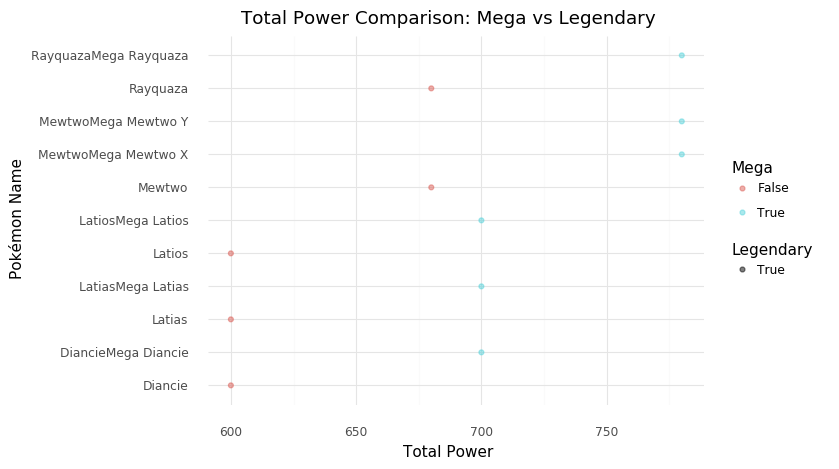

<ggplot: (125415267995)>

In [67]:
## Mega and Legendary Comparison - Total Power
(ggplot(LegP)                                                       # defining what data to use
 + aes(y='Name', x='Total',color='Mega', shape='Legendary')    # defining what variable to use
 + geom_point(alpha=0.5)                                          # defining the type of plot to use
 + labs(title='Total Power Comparison: Mega vs Legendary',
        y='Pokémon Name', x='Total Power') 
 + theme_minimal()
)

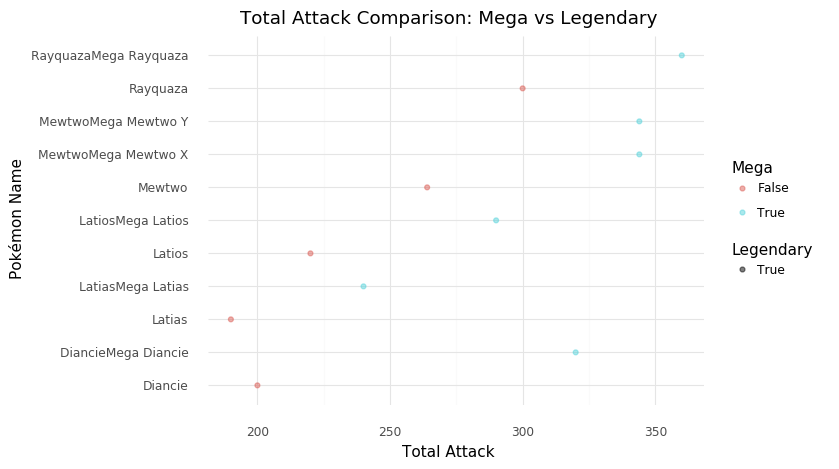

<ggplot: (125412296915)>

In [68]:
## Mega and Legendary Comparison - Total Attack
(ggplot(LegP)                                                       # defining what data to use
 + aes(y='Name', x='Total_Atk',color='Mega', shape='Legendary')    # defining what variable to use
 + geom_point(alpha=0.5)                                          # defining the type of plot to use
 + labs(title='Total Attack Comparison: Mega vs Legendary',
        y='Pokémon Name', x='Total Attack') 
 + theme_minimal()
)

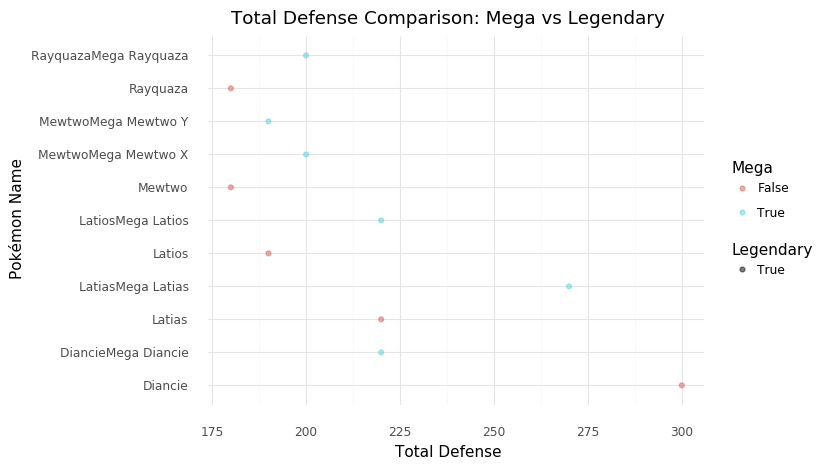

<ggplot: (125415701389)>

In [69]:
## Mega and Legendary Comparison - Total Defense
(ggplot(LegP)                                                       # defining what data to use
 + aes(y='Name', x='Total_Def',color='Mega', shape='Legendary')    # defining what variable to use
 + geom_point(alpha=0.5)                                          # defining the type of plot to use
 + labs(title='Total Defense Comparison: Mega vs Legendary',
        y='Pokémon Name', x='Total Defense') 
 + theme_minimal()
)

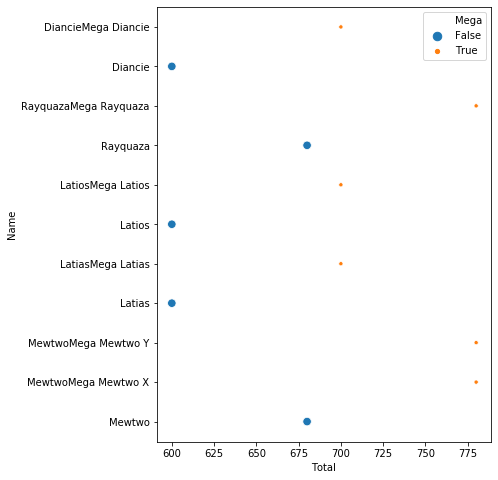

In [70]:
plt.figure(figsize=(6,8))
sns.scatterplot(x=LegP['Total'], y=LegP['Name'] ,hue=LegP['Mega'], size=LegP['Mega'])

Because Mewtwo(#150) is a special Pokemon, it has two type of mega forms, Mega Mewtwo X and Mega Mewtwo Y, in Mega Evaluation.   
So, we wiil do the analysis on Mewtwo(#150) later and see how the Mega Evalution effect on others. 

In [71]:
# Exclude Mewtwo(#150) for analysis on others
LegP[(LegP['#']!=150)]

,#,Name,Types,Type1,Type2,Total,Total_Atk,Total_Def,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Mega
417,380,Latias,2,Dragon,Psychic,600,190,220,80,80,90,110,130,110,3,True,False
418,380,LatiasMega Latias,2,Dragon,Psychic,700,240,270,80,100,120,140,150,110,3,True,True
419,381,Latios,2,Dragon,Psychic,600,220,190,80,90,80,130,110,110,3,True,False
420,381,LatiosMega Latios,2,Dragon,Psychic,700,290,220,80,130,100,160,120,110,3,True,True
425,384,Rayquaza,2,Dragon,Flying,680,300,180,105,150,90,150,90,95,3,True,False
426,384,RayquazaMega Rayquaza,2,Dragon,Flying,780,360,200,105,180,100,180,100,115,3,True,True
795,719,Diancie,2,Rock,Fairy,600,200,300,50,100,150,100,150,50,6,True,False
796,719,DiancieMega Diancie,2,Rock,Fairy,700,320,220,50,160,110,160,110,110,6,True,True


In [72]:
# Subset the Mewtwo(#150) for analysis
LegP[(LegP['#']==150)]

,#,Name,Types,Type1,Type2,Total,Total_Atk,Total_Def,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Mega
162,150,Mewtwo,1,Psychic,No value,680,264,180,106,110,90,154,90,130,1,True,False
163,150,MewtwoMega Mewtwo X,2,Psychic,Fighting,780,344,200,106,190,100,154,100,130,1,True,True
164,150,MewtwoMega Mewtwo Y,1,Psychic,No value,780,344,190,106,150,70,194,120,140,1,True,True


#### Total Power Comparison:

In [73]:
lastPdex=0
for i in LegP[(LegP['#']!=150)].iterrows():
    if i[1]['#']==lastPdex:
        difference = i[1]['Total'] - lastPower
        print('Pokédex No.{} {:20s} withot Mega Evaluation has {} total power'.format(lastPdex, lastPname, lastPower))
        print('Pokédex No.{} {:20s} with Mega Evaluation has {} total power'.format(i[1]['#'], i[1]['Name'], i[1]['Total']))
        print("The total power has been increased by {}\n".format(difference))
    else:
        lastPdex=i[1]['#']
        lastPname=i[1]['Name']
        lastPower=i[1]['Total']

Pokédex No.380 Latias               withot Mega Evaluation has 600 total power
Pokédex No.380 LatiasMega Latias    with Mega Evaluation has 700 total power
The total power has been increased by 100

Pokédex No.381 Latios               withot Mega Evaluation has 600 total power
Pokédex No.381 LatiosMega Latios    with Mega Evaluation has 700 total power
The total power has been increased by 100

Pokédex No.384 Rayquaza             withot Mega Evaluation has 680 total power
Pokédex No.384 RayquazaMega Rayquaza with Mega Evaluation has 780 total power
The total power has been increased by 100

Pokédex No.719 Diancie              withot Mega Evaluation has 600 total power
Pokédex No.719 DiancieMega Diancie  with Mega Evaluation has 700 total power
The total power has been increased by 100



Four pokemons, Latias(#380), Latios(#381), Rayquaza(#384) and Diancie(#719) have increase 100 total power by having Mega Evaluation.  
Now we are ready to analyze the status of Mewtwo(#150).

In [74]:
MGvalue1=0 #780
MGvalue2=0 #780
megaformindex1=0  #163
megaformindex2=0  #164
for i in LegP[(LegP['#']==150)].iterrows():
    if i[1]['Mega']=='True':
        print('Pokédex No.{} {:20s} with Mega Evaluation has {} total power'.format(i[1]['#'], i[1]['Name'], i[1]['Total']))
        if i[0]==megaformindex1 or megaformindex1>megaformindex2:
            megaformindex2=i[0]
            if i[1]['Total_Def'] > MGvalue2:
                MGvalue2 = i[1]['Total'] 
        else:
            megaformindex1=i[0]
            if i[1]['Total_Def'] > MGvalue1:
                MGvalue1 = i[1]['Total']
    else:
        print('Pokédex No.{} {:20s} without Mega Evaluation has {} total power\n'.format(i[1]['#'], i[1]['Name'], i[1]['Total']))
        lowestvalue=i[1]['Total']
    if megaformindex1>0 and megaformindex2==0:
        print("The total power has been increased by {}\n".format(MGvalue1 - lowestvalue))
    elif megaformindex2>0:
        print("The total power has been increased by {}\n".format(MGvalue2 - lowestvalue))

Pokédex No.150 Mewtwo               without Mega Evaluation has 680 total power

Pokédex No.150 MewtwoMega Mewtwo X  with Mega Evaluation has 780 total power
The total power has been increased by 100

Pokédex No.150 MewtwoMega Mewtwo Y  with Mega Evaluation has 780 total power
The total power has been increased by 100



Mewtwo(#150) has been increased by 100 total power as other four pokemons, Latias(#380), Latios(#381), Rayquaza(#384) and Diancie(#719).

#### Total Attack Comparison:

In [75]:
lastPdex=0
for i in LegP[(LegP['#']!=150)].iterrows():
    if i[1]['#']==lastPdex:
        difference = i[1]['Total_Atk'] - lastAtk
        print('Pokédex No.{} {:20s} without Mega Evaluation has {} total attack'.format(lastPdex, lastPname, lastAtk))
        print('Pokédex No.{} {:20s} with Mega Evaluation has {} total attack'.format(i[1]['#'], i[1]['Name'], i[1]['Total_Atk']))
        print("The total attack has been increased by {}\n".format(difference))
    else:
        lastPdex=i[1]['#']
        lastPname=i[1]['Name']
        lastAtk=i[1]['Total_Atk']

Pokédex No.380 Latias               without Mega Evaluation has 190 total attack
Pokédex No.380 LatiasMega Latias    with Mega Evaluation has 240 total attack
The total attack has been increased by 50

Pokédex No.381 Latios               without Mega Evaluation has 220 total attack
Pokédex No.381 LatiosMega Latios    with Mega Evaluation has 290 total attack
The total attack has been increased by 70

Pokédex No.384 Rayquaza             without Mega Evaluation has 300 total attack
Pokédex No.384 RayquazaMega Rayquaza with Mega Evaluation has 360 total attack
The total attack has been increased by 60

Pokédex No.719 Diancie              without Mega Evaluation has 200 total attack
Pokédex No.719 DiancieMega Diancie  with Mega Evaluation has 320 total attack
The total attack has been increased by 120



Diancie(#719) has been increased the most by 120 total attack and Latias(#380) has been increased the least by 50 total attack.

In [76]:
MGvalue1=0 #344
MGvalue2=0 #344
megaformindex1=0  #163
megaformindex2=0  #164
for i in LegP[(LegP['#']==150)].iterrows():
    if i[1]['Mega']=='True':
        print('Pokédex No.{} {:20s} with Mega Evaluation has {} total attack'.format(i[1]['#'], i[1]['Name'], i[1]['Total_Atk']))
        if i[0]==megaformindex1 or megaformindex1>megaformindex2:
            megaformindex2=i[0]
            if i[1]['Total_Def'] > MGvalue2:
                MGvalue2 = i[1]['Total_Atk'] 
        else:
            megaformindex1=i[0]
            if i[1]['Total_Def'] > MGvalue1:
                MGvalue1 = i[1]['Total_Atk']
    else:
        print('Pokédex No.{} {:20s} without Mega Evaluation has {} total attack\n'.format(i[1]['#'], i[1]['Name'], i[1]['Total_Atk']))
        lowestvalue=i[1]['Total_Atk']
    if megaformindex1>0 and megaformindex2==0:
        print("The total attack has been increased by {}\n".format(MGvalue1 - lowestvalue))
    elif megaformindex2>0:
        print("The total attack has been increased by {}\n".format(MGvalue2 - lowestvalue))

Pokédex No.150 Mewtwo               without Mega Evaluation has 264 total attack

Pokédex No.150 MewtwoMega Mewtwo X  with Mega Evaluation has 344 total attack
The total attack has been increased by 80

Pokédex No.150 MewtwoMega Mewtwo Y  with Mega Evaluation has 344 total attack
The total attack has been increased by 80



Mewtwo(#150) has been increased by 80 total attack. Overall, Diancie(#719) is the most enhanced pokemon on total attack.

#### Total Defense Comparison:

In [77]:
lastPdex=0
for i in LegP[(LegP['#']!=150)].iterrows():
    if i[1]['#']==lastPdex:
        difference = i[1]['Total_Def'] - lastDef
        print('Pokédex No.{} {:20s} without Mega Evaluation has {} total defense'.format(lastPdex, lastPname, lastDef))
        print('Pokédex No.{} {:20s} with Mega Evaluation has {} total defense'.format(i[1]['#'], i[1]['Name'], i[1]['Total_Def']))
        print("The total defense has been increased by {}\n".format(difference))
    else:
        lastPdex=i[1]['#']
        lastPname=i[1]['Name']
        lastDef=i[1]['Total_Def']

Pokédex No.380 Latias               without Mega Evaluation has 220 total defense
Pokédex No.380 LatiasMega Latias    with Mega Evaluation has 270 total defense
The total defense has been increased by 50

Pokédex No.381 Latios               without Mega Evaluation has 190 total defense
Pokédex No.381 LatiosMega Latios    with Mega Evaluation has 220 total defense
The total defense has been increased by 30

Pokédex No.384 Rayquaza             without Mega Evaluation has 180 total defense
Pokédex No.384 RayquazaMega Rayquaza with Mega Evaluation has 200 total defense
The total defense has been increased by 20

Pokédex No.719 Diancie              without Mega Evaluation has 300 total defense
Pokédex No.719 DiancieMega Diancie  with Mega Evaluation has 220 total defense
The total defense has been increased by -80



Diancie(#719) has been decreased the most by 80 total defense and Latias(#380) has been increased the most by 50 total defense.

In [78]:
MGvalue1=0 #200
MGvalue2=0 #190
megaformindex1=0  #163
megaformindex2=0  #164
for i in LegP[(LegP['#']==150)].iterrows():
    if i[1]['Mega']=='True':
        print('Pokédex No.{} {:20s} with Mega Evaluation has {} total defense'.format(i[1]['#'], i[1]['Name'], i[1]['Total_Def']))
        if i[0]==megaformindex1 or megaformindex1>megaformindex2:
            megaformindex2=i[0]
            if i[1]['Total_Def'] > MGvalue2:
                MGvalue2 = i[1]['Total_Def'] 
        else:
            megaformindex1=i[0]
            if i[1]['Total_Def'] > MGvalue1:
                MGvalue1 = i[1]['Total_Def']
    else:
        print('Pokédex No.{} {:20s} without Mega Evaluation has {} total defense\n'.format(i[1]['#'], i[1]['Name'], i[1]['Total_Def']))
        lowestvalue=i[1]['Total_Def']
    if megaformindex1>0 and megaformindex2==0:
        print("The total defense has been increased by {}\n".format(MGvalue1 - lowestvalue))
    elif megaformindex2>0:
        print("The total defense has been increased by {}\n".format(MGvalue2 - lowestvalue))

Pokédex No.150 Mewtwo               without Mega Evaluation has 180 total defense

Pokédex No.150 MewtwoMega Mewtwo X  with Mega Evaluation has 200 total defense
The total defense has been increased by 20

Pokédex No.150 MewtwoMega Mewtwo Y  with Mega Evaluation has 190 total defense
The total defense has been increased by 10



Mega Mewtwo X got 20 total defense increased and Mega Mewtwo Y got 10 total defense increased.

In summary, Diancie(#719) got boosted for 120 total attack power and got reduced for 80 total defense power. 
Mewtwo(#150) got 10 total defense power higher in Mega Mewtwo X form than Mega Mewtwo Y form. 
Overall, pokemon got enhanced the same amount of power in total. 

### 2. Is there any difference in a Pokémon’s power or skill between the two platforms? How are they different?

In [79]:
# adding .copy() to avoid SettingWithCopyWarning
# reference: https://stackoverflow.com/questions/38835483/confusion-re-pandas-copy-of-slice-of-dataframe-warning
GO = dfm[['#','Name','Go_Types','Go_Total', 'Go_Atk', 'Go_Def', 'Generation']].copy()
Switch = dfm[['#','Name','Types','Total','Total_Atk', 'Total_Def', 'Generation']].copy()
GO.rename(columns={'Go_Types':'Types',
                   'Go_Total':'Total',
                   'Go_Atk':'Total_Atk',
                   'Go_Def':'Total_Def'}, inplace=True)
GO.loc[:,'Platform']='PokemonGO'
Switch.loc[:,'Platform']='Games'

In [80]:
pokemon = pd.concat([GO,Switch])

In [81]:
pokemon

,#,Name,Types,Total,Total_Atk,Total_Def,Generation,Platform
0,1,Bulbasaur,2,357,128,118,1,PokemonGO
1,2,Ivysaur,2,449,155,151,1,PokemonGO
2,3,Venusaur,2,577,190,198,1,PokemonGO
3,4,Charmander,1,327,118,116,1,PokemonGO
4,5,Charmeleon,1,435,151,158,1,PokemonGO
...,...,...,...,...,...,...,...,...
523,631,Heatmor,1,484,202,132,5,Games
524,632,Durant,2,484,157,160,5,Games
525,633,Deino,2,300,110,100,5,Games
526,634,Zweilous,2,420,150,140,5,Games


#### Total Power Comparison for two platforms

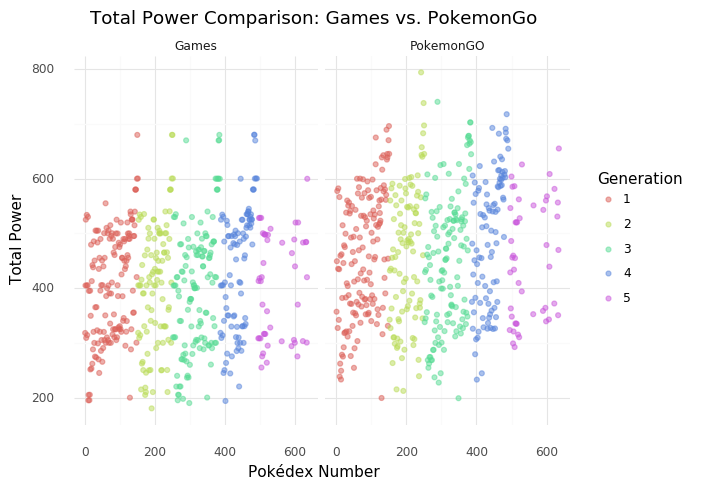

<ggplot: (125415720740)>

In [82]:
## Total Power Comparison
(ggplot(pokemon)         # defining what data to use
 + aes(x='#', y='Total',color='Generation')    # defining what variable to use
 + geom_jitter(alpha=0.5) # defining the type of plot to use
 + labs(title='Total Power Comparison: Games vs. PokemonGo',
        x='Pokédex Number', y='Total Power')
 + facet_wrap(' ~ Platform', nrow = 1)  # facet by platform
 + theme_minimal()
)

Surprisingly, PokemonGO platform has the pokemon, Blissey, with total power as high as 794.

In [83]:
# find the pokemon that has total power over 750
pokemon[pokemon['Total']>750]

,#,Name,Types,Total,Total_Atk,Total_Def,Generation,Platform
241,242,Blissey,1,794,496,129,2,PokemonGO


In the console games plantform, the pokemon, Blissey, has the total power only 540.

In [84]:
# find the pokedex number of 242
pokemon[pokemon['#']==242]

,#,Name,Types,Total,Total_Atk,Total_Def,Generation,Platform
241,242,Blissey,1,794,496,129,2,PokemonGO
241,242,Blissey,1,540,85,145,2,Games


#### Total Attack Comparison for two platforms

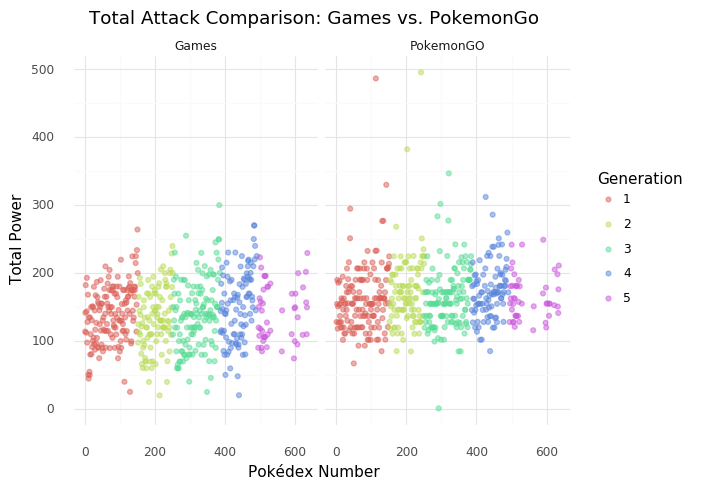

<ggplot: (-9223371911439049570)>

In [85]:
## Total Attack Comparison
(ggplot(pokemon)         # defining what data to use
 + aes(x='#', y='Total_Atk',color='Generation')    # defining what variable to use
 + geom_jitter(alpha=0.5) # defining the type of plot to use
 + labs(title='Total Attack Comparison: Games vs. PokemonGo',
        x='Pokédex Number', y='Total Power')
 + facet_wrap(' ~ Platform', nrow = 1)  # facet by platform
 + theme_minimal()
)

Here we see the pokemon, Blissey, again, showing the high value of total attack.

In [86]:
# find the pokemon that has total attack over 490
pokemon[pokemon['Total_Atk']>490]

,#,Name,Types,Total,Total_Atk,Total_Def,Generation,Platform
241,242,Blissey,1,794,496,129,2,PokemonGO


The status for both pokemons, Chansey and Blissey, are low in console games platform. 

In [87]:
# find the pokedex number of 242 and 113
pokemon[(pokemon['#']==242)]

,#,Name,Types,Total,Total_Atk,Total_Def,Generation,Platform
241,242,Blissey,1,794,496,129,2,PokemonGO
241,242,Blissey,1,540,85,145,2,Games


#### Total Defense Comparison for two platforms

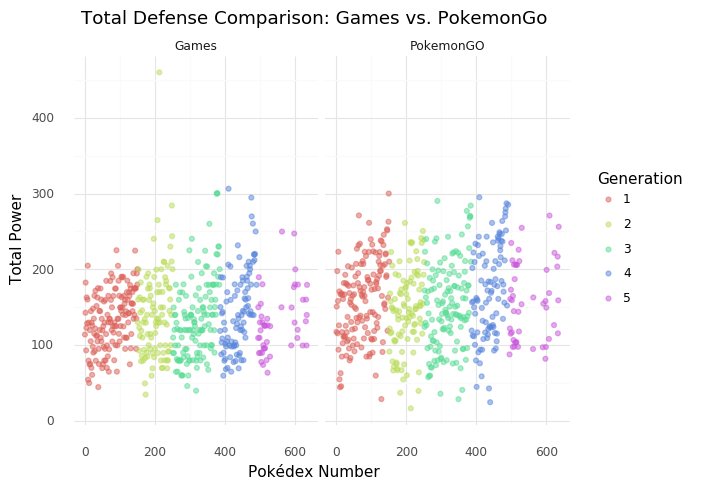

<ggplot: (125415534824)>

In [88]:
## Total Defense Comparison
(ggplot(pokemon)         # defining what data to use
 + aes(x='#', y='Total_Def',color='Generation')    # defining what variable to use
 + geom_jitter(alpha=0.5) # defining the type of plot to use
 + labs(title='Total Defense Comparison: Games vs. PokemonGo',
        x='Pokédex Number', y='Total Power')
 + facet_wrap(' ~ Platform', nrow = 1)  # facet by platform
 + theme_minimal()
)

The pokemon, Shuckle, has the highest total defense value among two platforms.

In [89]:
# find the pokemon that has total Defense over 400
pokemon[pokemon['Total_Def']>400]

,#,Name,Types,Total,Total_Atk,Total_Def,Generation,Platform
212,213,Shuckle,2,505,20,460,2,Games


In the PokemonGO, the pokemon has the low value of total defense of 17.

In [90]:
# find the pokedex number of 213
pokemon[(pokemon['#']==213)]

,#,Name,Types,Total,Total_Atk,Total_Def,Generation,Platform
212,213,Shuckle,2,498,85,17,2,PokemonGO
212,213,Shuckle,2,505,20,460,2,Games


### 3. Which Pokémon types have the most powerful moves? When combined with powers related to Pokémon themselves (i.e. HP, speed etc.?) which Pokémon are the strongest?

##### Part 1:
Which Pokémon types have the most powerful moves? 

##### Part 2:
When combined with powers related to Pokémon themselves (i.e. HP, speed etc?) which Pokémon are the strongest?

In [91]:
# Create aggregated data set comparing average measures by type
compare = moves.groupby(by = "Type").mean()
compare

,Power,Accuracy,PP,Prob
Type,,,,
Bug,40.645161,66.774194,15.354839,30.000000
Dark,38.750000,inf,13.454545,42.000000
Dragon,72.800000,76.800000,9.120000,23.333333
Electric,61.428571,inf,12.595238,48.666667
Fairy,37.000000,inf,10.433333,20.000000
Fighting,55.306122,inf,12.775510,60.000000
Fire,80.750000,82.500000,9.400000,40.526316
Flying,58.103448,inf,15.379310,41.666667
Ghost,56.250000,inf,10.142857,22.500000


In [92]:
# Identify top 3 Types for Power, Accuracy and PP
comparePower = compare.sort_values('Power', ascending = False)
compareAccuracy = compare.sort_values('Accuracy', ascending = False)
comparePP = compare.sort_values('PP', ascending = False)
# Iterate through rows in resulting data frame to print results
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
print('Top 3 Types with Powerful Moves:')       # print header
i=0                                          # initiate counter
for index, row in comparePower.iterrows():   # iterate through rows to print results
    i+=1
    if i > 3: 
        break
    print('{:d}. {:s}: {:.1f} average'.format(i, index, row['Power']))

print('\nTop 3 Types with Accurate Moves:')
i=0
for index, row in compareAccuracy.iterrows():
    i+=1
    if i > 3:
        break
    print('{:d}. {:s}: {:.1f} average'.format(i, index, row['Accuracy']))
    
print('\nTop 3 Types with PP Moves:')
i=0
for index, row in comparePP.iterrows():
    i+=1
    if i > 3: 
        break
    print('{:d}. {:s}: {:.1f} average'.format(i, index, row['PP']))

Top 3 Types with Powerful Moves:
1. Fire: 80.8 average
2. Dragon: 72.8 average
3. Water: 62.7 average

Top 3 Types with Accurate Moves:
1. Grass: inf average
2. Normal: inf average
3. Electric: inf average

Top 3 Types with PP Moves:
1. Poison: 16.9 average
2. Normal: 16.7 average
3. Flying: 15.4 average


##### Outside research
Are "Power" and "PP" the same thing?  

Answer: No, they are different. 
PP is an abbreviation of Power Points. Power Points measure the number of times a move can be used. The higher the PP, the more times you can use the move. PP are essential for attacking, supporting, stalling, recovering, and defending.

Source: https://pokemon.fandom.com/wiki/PP

In [93]:
# How many pokemon types have an average accuracy of infinity?
i=0
for index, row in compare.iterrows():
    if row['Accuracy']==float('inf'):
        i+=1
print(i, 'Pokemon Type Moves have an average accuracy of infinity.')

# Count the type that has the most moves with infinite accuracy
infMoves = []      # create empty list to store pokemon move types with infinite accuracy
for index, row in moves.iterrows():  # iterate through dataframe
    if row['Accuracy']==float('inf'):  # if accuracy is infinite, add type to list
        infMoves.append(row['Type'])
# observe results
for type in infMoves:
    print(type)

10 Pokemon Type Moves have an average accuracy of infinity.
Flying
Fighting
Fairy
Dark
Dark
Dark
Psychic
Grass
Steel
Electric
Ghost
Electric
Normal
Normal
Normal
Fighting


In [94]:
# use dictionary to count number of occurences
# https://stackoverflow.com/questions/3496518/using-a-dictionary-to-count-the-items-in-a-list
infDict = {}
for type in infMoves:
    infDict[type] = infDict.get(type,0) + 1
    
# print types of pokemon with more than 1 move with infinite accuracy
for key, value in infDict.items():
    if value > 1:
        print('{:s} Pokemon: {:d} moves with infinite accuracy'.format(key, value))

Fighting Pokemon: 2 moves with infinite accuracy
Dark Pokemon: 3 moves with infinite accuracy
Electric Pokemon: 2 moves with infinite accuracy
Normal Pokemon: 3 moves with infinite accuracy


In [95]:
# Try Median as measure of center
compareMed = moves.groupby(by = "Type").median()
compareMedAccuracy = compareMed.sort_values('Accuracy', ascending = False)

# print results
print('\nTop 3 Types with Accurate Moves (Median):')
i=0
for index, row in compareMedAccuracy.iterrows():
    i+=1
    if i > 3:
        break
    print('{:d}. {:s}: {:.1f} average'.format(i, index, row['Accuracy']))



Top 3 Types with Accurate Moves (Median):
1. Bug: 100.0 average
2. Fighting: 100.0 average
3. Dark: 100.0 average


In [96]:
# Combine average power, pp and probability by type with median accuracy
compareMean = moves.groupby(by = "Type").mean() # calculate mean for all measures
compareMedian = moves.groupby(by="Type").median() # calculate median for all measures
compareMean = compareMean[['Power', 'PP', 'Prob']] # select features which will be measured with mean
compareMedian = compareMedian[['Accuracy']] # select features which will be measured with median
compareMix = compareMean.join(compareMedian) # join datasets
compareMix

,Power,PP,Prob,Accuracy
Type,,,,
Bug,40.645161,15.354839,30.000000,100.0
Dark,38.750000,13.454545,42.000000,100.0
Dragon,72.800000,9.120000,23.333333,100.0
Electric,61.428571,12.595238,48.666667,100.0
Fairy,37.000000,10.433333,20.000000,37.5
Fighting,55.306122,12.775510,60.000000,100.0
Fire,80.750000,9.400000,40.526316,100.0
Flying,58.103448,15.379310,41.666667,95.0
Ghost,56.250000,10.142857,22.500000,100.0


In [97]:
# Identify top 3 Types for Power, Accuracy and PP
comparePower = compareMix.sort_values('Power', ascending = False)
compareAccuracy = compareMix.sort_values('Accuracy', ascending = False)
comparePP = compareMix.sort_values('PP', ascending = False)

# Iterate through rows in resulting data frame to print results
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
print('Top 3 Types with Powerful Moves:')       # print header
i=0                                          # initiate counter
for index, row in comparePower.iterrows():   # iterate through rows to print results
    i+=1
    if i > 3: 
        break
    print('{:d}. {:s}: {:.1f} average'.format(i, index, row['Power']))
    
print('\nTop 3 Types with PP Moves:')
i=0
for index, row in comparePP.iterrows():
    i+=1
    if i > 3: 
        break
    print('{:d}. {:s}: {:.1f} average'.format(i, index, row['PP']))
    
print('\nTop Types with Accurate Moves:')
i=0
for index, row in compareAccuracy.iterrows():
    if row['Accuracy'] == 100:
        i+=1
        print('{:d}. {:s}: {:.1f} median'.format(i,index, row['Accuracy']))


Top 3 Types with Powerful Moves:
1. Fire: 80.8 average
2. Dragon: 72.8 average
3. Water: 62.7 average

Top 3 Types with PP Moves:
1. Poison: 16.9 average
2. Normal: 16.7 average
3. Flying: 15.4 average

Top Types with Accurate Moves:
1. Bug: 100.0 median
2. Fighting: 100.0 median
3. Dark: 100.0 median
4. Ghost: 100.0 median
5. Fire: 100.0 median
6. Grass: 100.0 median
7. Electric: 100.0 median
8. Dragon: 100.0 median


#### Question 3 Part II: 
When combined with powers related to Pokémon themselves (i.e. HP, speed etc?) which Pokémon are the strongest?

In [98]:
# read in pokemon dataset for quick analysis. reuse code from prior section 
import pandas as pd
pokemon = pd.read_csv('Pokemon.csv')
pokemon = pokemon.drop(['#'], axis=1) #drop the duplicate column
pokemon.rename(columns={'Type 1':'Type1',
                   'Type 2':'Type2',
                   'Sp. Atk':'Sp_Atk',
                   'Sp. Def':'Sp_Def',}, inplace=True)
fill_na = {'Type2':'No value'} # create a dictionary for filling na values
pokemon=pokemon.fillna(value=fill_na)
print('Number of null values in dataframe:\n', pokemon.isnull().sum())
pokemon

Number of null values in dataframe:
 Name          0
Type1         0
Type2         0
Total         0
HP            0
Attack        0
Defense       0
Sp_Atk        0
Sp_Def        0
Speed         0
Generation    0
Legendary     0
dtype: int64


,Name,Type1,Type2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,No value,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,No value,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,No value,314,44,48,65,50,64,43,1,False


In [99]:
# Group by type and summarise with average
pokeGroup = pokemon.groupby("Type1").mean()

# Use "Total" for comparison since it compares total power
pokeGroup = pokeGroup.sort_values('Total', ascending = False)
# rank by total points
# http://www.datasciencemadesimple.com/rank-dataframe-python-pandas-min-max-dense-rank-group/
pokeGroup['total_ranked']=pokeGroup['Total'].rank(ascending=0)
pokeGroup

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,total_ranked
Type1,,,,,,,,,,
Dragon,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000,1.0
Steel,487.703704,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,3.851852,0.148148,2.0
Flying,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000,3.0
Psychic,475.947368,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,3.385965,0.245614,4.0
Fire,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154,5.0
Rock,453.750000,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545,0.090909,6.0
Dark,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516,7.0
Electric,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909,8.0
Ghost,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500,9.0


In [100]:
# Join moves dataset and Pokemon dataset
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
full = compareMix.join(pokeGroup)
full = full.sort_values('Total')
full

,Power,PP,Prob,Accuracy,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,total_ranked
Type,,,,,,,,,,,,,,
Bug,40.645161,15.354839,30.000000,100.0,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000,18.0
Poison,33.793103,16.931034,31.666667,90.0,399.142857,67.250000,74.678571,68.821429,60.428571,64.392857,63.571429,2.535714,0.000000,17.0
Normal,28.153439,16.740741,39.333333,85.0,401.683673,77.275510,73.469388,59.846939,55.816327,63.724490,71.551020,3.051020,0.020408,16.0
Fairy,37.000000,10.433333,20.000000,37.5,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824,15.0
Fighting,55.306122,12.775510,60.000000,100.0,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000,14.0
Grass,48.431373,14.137255,51.666667,100.0,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143,0.042857,13.0
Water,62.682927,12.243902,28.000000,95.0,430.455357,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143,0.035714,12.0
Ice,52.037037,13.925926,37.500000,90.0,433.458333,72.000000,72.750000,71.416667,77.541667,76.291667,63.458333,3.541667,0.083333,11.0
Ground,45.892857,11.285714,58.333333,92.5,437.500000,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,3.156250,0.125000,10.0


In [101]:
# Create subset dataframes that are sorted for printing results
fullPower = full.sort_values('Power', ascending = False)
fullAcc = full.sort_values('total_ranked', ascending = True)
fullPP = full.sort_values('PP', ascending = False)
# Iterate through rows in resulting data frame to print results
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
print('Top 3 Types with Powerful Moves:')       # print header
i=0                                          # initiate counter
for index, row in fullPower.iterrows():   # iterate through rows to print results
    i+=1
    if i > 3: 
        break
    print('{:d}. {:s}: {:.1f} mean. \n\tOverall strength rank of Pokemon Type: {:.0f} of 18.'.format(i, index, row['Power'], row['total_ranked']))
    
print('\nTop 3 Types with PP Moves:')
i=0
for index, row in fullPP.iterrows():
    i+=1
    if i > 3: 
        break
    print('{:d}. {:s}: {:.1f} mean.\n\tOverall strength rank of Pokemon Type: {:.0f} of 18.'.format(i, index, row['PP'], row['total_ranked']))


print('\nTop Types with Accurate Moves:')
i=0
for index, row in fullAcc.iterrows():
    if row['Accuracy'] == 100:
        i+=1
        print('{:d}. {:s}: {:.1f} median.\n\tOverall strength rank of Pokemon Type: {:.0f} of 18.'.format(i,index, row['Accuracy'], row['total_ranked']))


Top 3 Types with Powerful Moves:
1. Fire: 80.8 mean. 
	Overall strength rank of Pokemon Type: 5 of 18.
2. Dragon: 72.8 mean. 
	Overall strength rank of Pokemon Type: 1 of 18.
3. Water: 62.7 mean. 
	Overall strength rank of Pokemon Type: 12 of 18.

Top 3 Types with PP Moves:
1. Poison: 16.9 mean.
	Overall strength rank of Pokemon Type: 17 of 18.
2. Normal: 16.7 mean.
	Overall strength rank of Pokemon Type: 16 of 18.
3. Flying: 15.4 mean.
	Overall strength rank of Pokemon Type: 3 of 18.

Top Types with Accurate Moves:
1. Dragon: 100.0 median.
	Overall strength rank of Pokemon Type: 1 of 18.
2. Fire: 100.0 median.
	Overall strength rank of Pokemon Type: 5 of 18.
3. Dark: 100.0 median.
	Overall strength rank of Pokemon Type: 7 of 18.
4. Electric: 100.0 median.
	Overall strength rank of Pokemon Type: 8 of 18.
5. Ghost: 100.0 median.
	Overall strength rank of Pokemon Type: 9 of 18.
6. Grass: 100.0 median.
	Overall strength rank of Pokemon Type: 13 of 18.
7. Fighting: 100.0 median.
	Overall s

It looks like the pokemon types with the most powerful moves on average tend to be the pokemon
types that are the weakest on their own.
there are 2 exceptions: Dragon: 2nd most powerful moves and #1 total inherent
Flying is 3rd PP and 3rd overall

In [102]:
# Plot results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
# Color code ranking: assign colors to top and bottom 6. 
# https://datatofish.com/if-condition-in-pandas-dataframe/
full.loc[full.total_ranked<=6, 'color']='red'  # most powerful
full.loc[full.total_ranked>6, 'color']='blue'  # middle
full.loc[full.total_ranked>=12, 'color']='gold' # least powerful
full

,Power,PP,Prob,Accuracy,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,total_ranked,color
Type,,,,,,,,,,,,,,,
Bug,40.645161,15.354839,30.000000,100.0,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000,18.0,gold
Poison,33.793103,16.931034,31.666667,90.0,399.142857,67.250000,74.678571,68.821429,60.428571,64.392857,63.571429,2.535714,0.000000,17.0,gold
Normal,28.153439,16.740741,39.333333,85.0,401.683673,77.275510,73.469388,59.846939,55.816327,63.724490,71.551020,3.051020,0.020408,16.0,gold
Fairy,37.000000,10.433333,20.000000,37.5,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824,15.0,gold
Fighting,55.306122,12.775510,60.000000,100.0,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000,14.0,gold
Grass,48.431373,14.137255,51.666667,100.0,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143,0.042857,13.0,gold
Water,62.682927,12.243902,28.000000,95.0,430.455357,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143,0.035714,12.0,gold
Ice,52.037037,13.925926,37.500000,90.0,433.458333,72.000000,72.750000,71.416667,77.541667,76.291667,63.458333,3.541667,0.083333,11.0,blue
Ground,45.892857,11.285714,58.333333,92.5,437.500000,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,3.156250,0.125000,10.0,blue


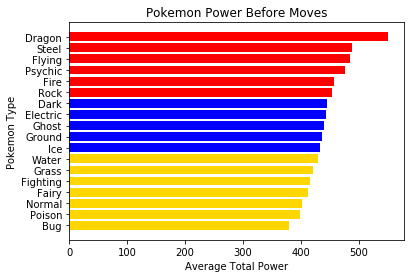

In [103]:
# Plot Pokemon Power before moves
plt.barh(full.index.values, full['Total'], color = full['color'])
plt.xlabel("Average Total Power")
plt.ylabel("Pokemon Type")
plt.title("Pokemon Power Before Moves");

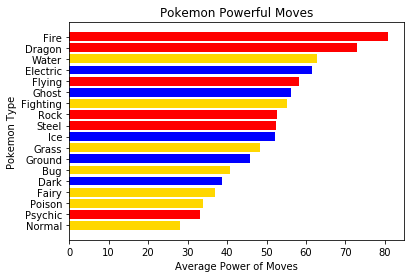

In [104]:
# Plot power of POkemon moves by type
fullPowerD = full.sort_values('Power', ascending = True)
plt.barh(fullPowerD.index.values, fullPowerD['Power'], color = fullPowerD['color'])
plt.xlabel("Average Power of Moves")
plt.ylabel("Pokemon Type")
plt.title("Pokemon Powerful Moves"); 

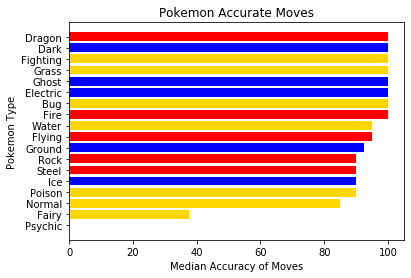

In [105]:
# Plot accuracy of moves by type
fullAcc = full.sort_values('Accuracy', ascending = True)
plt.barh(fullAcc.index.values, fullAcc['Accuracy'], color = fullAcc['color'])
plt.xlabel("Median Accuracy of Moves")
plt.ylabel("Pokemon Type")
plt.title("Pokemon Accurate Moves"); 

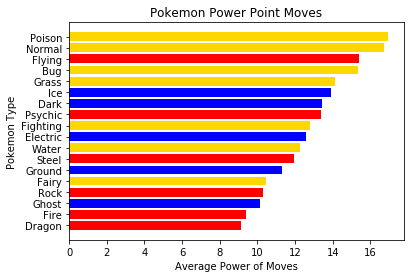

In [106]:
# Plot PP of moves by type
fullPP = full.sort_values('PP', ascending = True)
plt.barh(fullPP.index.values, fullPP['PP'], color = fullPP['color'])
plt.xlabel("Average Power of Moves")
plt.ylabel("Pokemon Type")
plt.title("Pokemon Power Point Moves"); 

### 4. Which Pokémon are most popular, as measured by mentions on social media platforms? (might drop this question)

Given the query limitations of the free version of the Twitter API, this will be measured in a binary manner: if a Pokemon was mentioned in a hashtag on Twitter in the last 7 days, it will be considered popular.

In [107]:
# calculate the percentage of popular pokemon
pct_pop = 100*(len(included) / (len(included) + len(missing)))
print('{:.1f}% of non-Mega Pokemon from our Original Pokemon Data Set are popular. That is to say, they have been mentioned in a twitter hashtag at least once in the last 7 days.'.format(pct_pop))

33.8% of non-Mega Pokemon from our Original Pokemon Data Set are popular. That is to say, they have been mentioned in a twitter hashtag at least once in the last 7 days.


In [108]:
## Aggregate popularity by type 
typesGrp = pd.DataFrame(types[['Type','Popular']].groupby(['Type','Popular']).size())  # group by type and program and count number of cases in each group
typesGrp = typesGrp.reset_index()   # 'ungroup' dataframe
typesGrp = typesGrp.rename(columns={0:'Count'})  # rename columns
# export resulting table to create Sankey diagram in R :)
typesGrp.to_csv('PokemonTypesPopular.csv')
typesGrp

,Type,Popular,Count
0,Bug,False,46
1,Bug,True,19
2,Dark,False,31
3,Dark,True,13
4,Dragon,False,21
5,Dragon,True,15
6,Electric,False,26
7,Electric,True,15
8,Fairy,False,19
9,Fairy,True,14


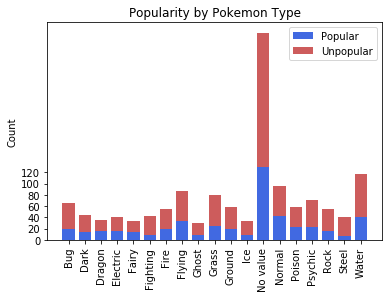

In [109]:
# Use matplotlib.pyplot to create stacked bar chart
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html

# make sure libraries are loaded
import numpy as np
import matplotlib.pyplot as plt

# subset popular and unpopular Pokemon
unpopular = typesGrp[typesGrp.Popular=="False"]['Count']
unpopular = [i for i in unpopular]
popular = typesGrp[typesGrp.Popular=="True"]['Count']
popular = [i for i in popular]
# identify number of bars (i.e. groups in data set)
N = 19
ind = np.arange(N) # set index for x-axis
width=0.75  # specify width of bar
p1 =plt.bar(ind, popular, width, color = 'royalblue') # define bottom of stacked bar, popular
p2 = plt.bar(ind, unpopular, width, color = 'indianred', # define top of stacked bar, unpopular
             bottom=popular)
plt.ylabel('Count')  # label y axis
plt.title('Popularity by Pokemon Type')  # define title
# create x axis labels
xtick = []
# create list of unique type names
for index, row in typesGrp.iterrows():
    if row['Type'] not in xtick:
        xtick.append(row['Type'])
# provide x axis labels
plt.xticks(ind, xtick, rotation = 'vertical')
plt.yticks(np.arange(0,140,20))  # define y tick marks
plt.legend((p1[0], p2[0]), ('Popular', 'Unpopular'))  # define legend
# show plot
plt.show()

This is not too informative because it doesn't account for overall size of Pokemon Type group. Apply normalization by 
calculating/graphing percentage of Type as opposed to total number.

In [110]:
# In order to calculate percent popular, first identify total number of members in each group
# Aggregate list of Pokemon types and count size of each group.
typesCt = pd.DataFrame(types[['Type']].groupby(['Type']).size())  # store as Pandas Dataframe
typesCt = typesCt.reset_index()  # Reset index of resulting data frame (similar to ungroup)
typesCt = typesCt.rename(columns={0:'Count'}) # rename columns for ease of analysis
typesCt # preview list

,Type,Count
0,Bug,65
1,Dark,44
2,Dragon,36
3,Electric,41
4,Fairy,33
5,Fighting,43
6,Fire,55
7,Flying,87
8,Ghost,30
9,Grass,80


In [111]:
# Join list of popularity by type to list of total counts per type
pctPopular = typesGrp.join(typesCt.set_index('Type'), on='Type', rsuffix='_GrpTotal')
# calculate percent popularity
pctPopular['PctPop'] = (pctPopular['Count'] / pctPopular['Count_GrpTotal'])
# preview table
pctPopular 
# preview most popular types
pctPopular[typesGrp.Popular=="True"].sort_values(by = 'PctPop',ascending=False)

,Type,Popular,Count,Count_GrpTotal,PctPop
27,Normal,True,42,96,0.437500
9,Fairy,True,14,33,0.424242
5,Dragon,True,15,36,0.416667
15,Flying,True,33,87,0.379310
29,Poison,True,22,59,0.372881
7,Electric,True,15,41,0.365854
25,No value,True,129,368,0.350543
13,Fire,True,19,55,0.345455
37,Water,True,40,117,0.341880
31,Psychic,True,23,70,0.328571


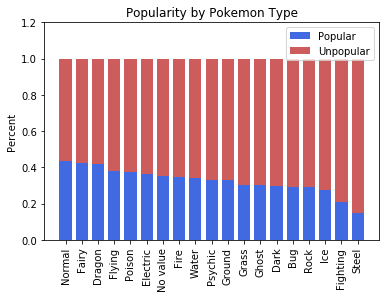

In [112]:
## Create another stacked bar plot, in which the values are percentages and add up to 1
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

# subset popular and unpopular from new percentage list
unpopular = pctPopular[pctPopular.Popular=="False"]['PctPop']
popular = pctPopular[pctPopular.Popular=="True"]['PctPop']
# sort subset lists in order of most to least popular
unpopular = unpopular.sort_values()
popular = popular.sort_values(ascending=False)
# convert dadaframe to a list
unpopular = [i for i in unpopular]
popular = [i for i in popular]
# identify number of bars (i.e. groups in data set)
N = 19
ind = np.arange(N) # set index for x axis
width=.75  # set width of bars
p1=plt.bar(ind,popular, width, color = 'royalblue')  # plot popularity
p2 = plt.bar(ind, unpopular, width, color='indianred',  # plot unpopularity
             bottom=popular) 
plt.ylabel('Percent')    # apply labels
plt.title('Popularity by Pokemon Type')  # define title
# create x-axis labels
# create subset to generate x axis labels
xlab = pctPopular[pctPopular.Popular=="True"].sort_values('PctPop', ascending = False)
# create empty list to store labels
xtick = []
# iterate through subset to create list of x tick labels
for index, row in xlab.iterrows():
    xtick.append(row['Type'])

# set x-axis labels
plt.xticks(ind, xtick, rotation = 'vertical')
plt.yticks(np.arange(0,1.3,.2))  # set y-axis tick labels
plt.legend((p1[0], p2[0]), ('Popular', 'Unpopular'))  # format legend

plt.show() # display plot

In [113]:
## Iterate through list of popular and unpopular to spell out the most and least popular types
# subset popular pokemon, arranging from most to least popular
popularlist = pctPopular[typesGrp.Popular=="True"].sort_values('PctPop', ascending = False)
# reformat decimal to display as percentage
popularlist["PctPop"]=popularlist["PctPop"]*100
# Print results
print('The most popular Pokemon Types are:')
for index, row in popularlist.head(5).iterrows():
        print('{:s}: {:.1f}% were mentioned on Twitter'.format(row['Type'], row['PctPop']))

# re-iterate through list, least to most popular
unpopularlist = popularlist.sort_values('PctPop', ascending = True)
print('\nThe least popular Pokemon Types are:')
for index, row in unpopularlist.head(5).iterrows():
        print('{:s}: only {:.1f}% were mentioned on Twitter'.format(row['Type'], row['PctPop']))

The most popular Pokemon Types are:
Normal: 43.8% were mentioned on Twitter
Fairy: 42.4% were mentioned on Twitter
Dragon: 41.7% were mentioned on Twitter
Flying: 37.9% were mentioned on Twitter
Poison: 37.3% were mentioned on Twitter

The least popular Pokemon Types are:
Steel: only 15.0% were mentioned on Twitter
Fighting: only 20.9% were mentioned on Twitter
Ice: only 27.3% were mentioned on Twitter
Rock: only 29.1% were mentioned on Twitter
Bug: only 29.2% were mentioned on Twitter


In [114]:
popularlist.sort_values('PctPop', ascending = True).head(5)

,Type,Popular,Count,Count_GrpTotal,PctPop
35,Steel,True,6,40,15.000000
11,Fighting,True,9,43,20.930233
23,Ice,True,9,33,27.272727
33,Rock,True,16,55,29.090909
1,Bug,True,19,65,29.230769


#### Gather more information about what makes a popular pokemon

In [115]:
## Analyze popularity of legendary pokemon
# create new dataset, grouped by legendary, popularity and count how many in each

# Count number of legendary/non-legendary pokemon, store in dataframe
legendaryCount = pokemonDF[['Legendary']].groupby(['Legendary']).size().to_frame()
# Group by legendary and popularity, store in data frame
legendaryPopular = pokemonDF[['Legendary', 'Popular']].groupby(['Legendary', 'Popular']).size().to_frame()
# join two datasets together 
legendaryPopular = legendaryPopular.join(legendaryCount, on = 'Legendary', rsuffix='_total') 
# reset indices and rename columns for ease of analysis
legendaryPopular = legendaryPopular.reset_index()
legendaryPopular = legendaryPopular.rename(columns={'0':'Count', '0_total':'Total'})
# Calculate percentage: popularity count / group count
legendaryPopular['Pct'] = legendaryPopular['Count']/legendaryPopular['Total']
legendaryPopular

,Legendary,Popular,Count,Total,Pct
0,False,False,446,667,0.668666
1,False,True,221,667,0.331334
2,True,False,21,38,0.552632
3,True,True,17,38,0.447368


In [116]:
# Print statement comparing popularity of legendary v. non-legendary Pokemon
legpop = (legendaryPopular[((legendaryPopular.Legendary=="True") & (legendaryPopular.Popular=="True"))]['Pct'])*100
legpop=[i for i in legpop]
unlegpop = (legendaryPopular[((legendaryPopular.Legendary=="False") & (legendaryPopular.Popular=="True"))]['Pct'])*100
unlegpop=[i for i in unlegpop]
if legpop > unlegpop:
    print('Legendary Pokemon are more popular than non-Legendary Pokemon. \n{:.1f}% of Legendary Pokemon were mentioned in a tweet. \nOnly {:.1f}% of non-Legendary Pokemon were mentioned.'.format(legpop[0], unlegpop[0]))
else:
    if legpop < unlegpop:
        print('Non-Legendary Pokemon are more popular than non-Legendary Pokemon. \n{:.1f}% of non-Legendary Pokemon were mentioned in a tweet. \nOnly {:.1f}% of Legendary Pokemon were mentioned.'.format(unlegpop[0], legpop[0]))

Legendary Pokemon are more popular than non-Legendary Pokemon. 
44.7% of Legendary Pokemon were mentioned in a tweet. 
Only 33.1% of non-Legendary Pokemon were mentioned.


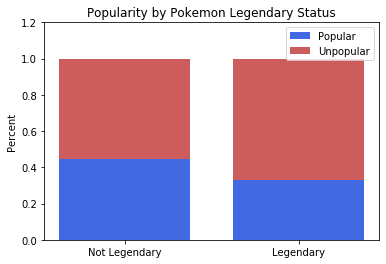

In [117]:
# Plot comparison of popularity of legendary v. non-legendary Pokemon

import numpy as np
import matplotlib.pyplot as plt

# subset popular and unpopular
unpopular = legendaryPopular[legendaryPopular.Popular=="False"]['Pct'].sort_values()
popular = legendaryPopular[legendaryPopular.Popular=="True"]['Pct'].sort_values(ascending=False)

# convert dadaframe to a list
unpopular = [i for i in unpopular]
popular = [i for i in popular]

N = 2 # define number of groups to plot along x axis
ind = np.arange(N) # apply indexing to x axis
width=.75 # define width of each bar
# begin plots
p1=plt.bar(ind,popular, width, color = 'royalblue')  # plot popular pokemon
p2 = plt.bar(ind, unpopular, width, color = 'indianred', # plot unpopular pokemon
             bottom=popular)
plt.ylabel('Percent') # apply label to y axis
plt.title('Popularity by Pokemon Legendary Status')  # define title
plt.xticks(ind, ('Not Legendary', 'Legendary'))  # define legend
plt.yticks(np.arange(0,1.3,.2))  # configure y axis tick marks
plt.legend((p1[0], p2[0]), ('Popular', 'Unpopular')) # define legend

plt.show()

In [118]:
## Analyze popularity of generations
# create new dataset, grouped by generation and popularity, and count how many are in each group

# create new dataframe containing counts of each generation
genCount = pokemonDF[['Generation']].groupby(['Generation']).size().to_frame()
genCount = genCount.reset_index()
# create new dataframe containing counts of groups of generation / popularity ind
genPopular = pokemonDF[['Generation', 'Popular']].groupby(['Generation', 'Popular']).size().to_frame()
# reset indices and rename columns for ease of analysis
genPopular = genPopular.reset_index()
genPopular = genPopular.rename(columns = {0: 'Count'})
# I could not join these dataframes together for whatever reason, so I will add a list of totals per group
ct = [] # create empty count list
for index, row in genCount.iterrows():
    ct.append(row[0]) # add count for each generation twice
    ct.append(row[0])
genPopular['Total'] = ct # store count list as total in genPopular dataframe
# calculate percent popularity
genPopular['Pct'] = (genPopular['Count']/genPopular['Total'])
# observe results
genPopular[genPopular.Popular=='True'].sort_values(by = 'Pct', ascending = False)

,Generation,Popular,Count,Total,Pct
1,1,True,56,150,0.373333
5,3,True,47,134,0.350746
3,2,True,35,100,0.350000
9,5,True,50,150,0.333333
7,4,True,33,103,0.320388
11,6,True,17,68,0.250000


In [119]:
# Identify min and max popular percent
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmax.html
maxix = genPopular[genPopular.Popular=='True']['Pct'].idxmax()
minix = genPopular[genPopular.Popular=='True']['Pct'].idxmin()
print('The most popular generation of Pokemon is generation {:s}: \n{:.1f}% of its Pokemon were tweeted about.'.format(genPopular['Generation'][maxix], (genPopular['Pct'][maxix]*100)))
print('The least popular generation of Pokemon is generation {:s}: \nonly {:.1f}% of its Pokemon were tweeted about.'.format(genPopular['Generation'][minix], (genPopular['Pct'][minix]*100)))

The most popular generation of Pokemon is generation 1: 
37.3% of its Pokemon were tweeted about.
The least popular generation of Pokemon is generation 6: 
only 25.0% of its Pokemon were tweeted about.


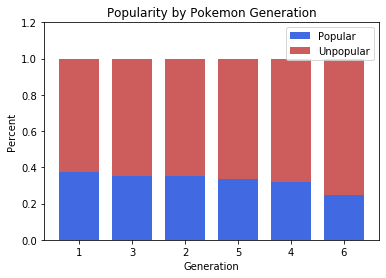

In [120]:
# Plot stacked bar charts
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

# subset popular and unpopular 
unpopular = genPopular[genPopular.Popular=="False"]['Pct'].sort_values()  
popular = genPopular[genPopular.Popular=="True"]['Pct'].sort_values(ascending=False)

# convert dadaframe to a list
unpopular = [i for i in unpopular]
popular = [i for i in popular]

N = 6  # define number of groups to plot
ind = np.arange(N) # apply indexing to x axis
width=.75    # define width of each bar
# begin plots
p1=plt.bar(ind,popular, width, color = 'royalblue') # plot Popular pokemon on the bottom
p2 = plt.bar(ind, unpopular, width, color = 'indianred',  # plot unpopular Pokemon on top
             bottom=popular)
plt.ylabel('Percent') # apply label to y axis
plt.xlabel('Generation') # apply label to x axis
plt.title('Popularity by Pokemon Generation')  # Apply title
# generate x tick labels
xtick = []
for index, row in genPopular[genPopular.Popular=="True"].sort_values('Pct', ascending = False).iterrows():
    xtick.append(row['Generation'])
plt.xticks(ind, xtick)  # Define labels for x-axis tick parks
plt.yticks(np.arange(0,1.3,.2)) # define labels for y-axis tick marks
plt.legend((p1[0], p2[0]), ('Popular', 'Unpopular'))  # define legend

plt.show()  # display plot

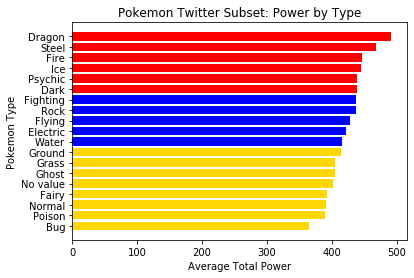

In [121]:
## Examine power by type of Pokemon in our Twitter analysis subset

types['Total'] = types['Total'].astype('int')
pokeGroup = types.groupby('Type').mean()
pokeGroup = pokeGroup.sort_values('Total')
pokeGroup['total_ranked']=pokeGroup['Total'].rank(ascending=0)
# assign colors to top and bottom 5. 
# https://datatofish.com/if-condition-in-pandas-dataframe/
pokeGroup.loc[pokeGroup.total_ranked<=6, 'color']='red'  # most powerful
pokeGroup.loc[pokeGroup.total_ranked>6, 'color']='blue'  # middle
pokeGroup.loc[pokeGroup.total_ranked>=12, 'color']='gold' # least powerful
pokeGroup


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

plt.barh(pokeGroup.index.values, pokeGroup['Total'], color = pokeGroup['color'])
plt.xlabel("Average Total Power")
plt.ylabel("Pokemon Type")
plt.title("Pokemon Twitter Subset: Power by Type");

In [122]:
# Rank by popularity
popularrank = pctPopular[pctPopular.Popular=="True"].copy() # subset popular
popularrank['pop_rank'] = popularrank['PctPop'].rank(ascending=0) # rank bypopularity 

In [123]:
# Join popularity rank to power ranking dataset
popularrank = popularrank.join(pokeGroup, on = 'Type')
popularrank

,Type,Popular,Count,Count_GrpTotal,PctPop,pop_rank,Total,total_ranked,color
1,Bug,True,19,65,0.292308,15.0,365.523077,19.0,gold
3,Dark,True,13,44,0.295455,14.0,438.204545,6.0,red
5,Dragon,True,15,36,0.416667,3.0,491.222222,1.0,red
7,Electric,True,15,41,0.365854,6.0,421.878049,10.0,blue
9,Fairy,True,14,33,0.424242,2.0,391.939394,16.0,gold
11,Fighting,True,9,43,0.209302,18.0,437.511628,7.0,blue
13,Fire,True,19,55,0.345455,8.0,445.945455,3.0,red
15,Flying,True,33,87,0.379310,4.0,428.609195,9.0,blue
17,Ghost,True,9,30,0.300000,12.5,404.833333,14.0,gold
19,Grass,True,24,80,0.300000,12.5,404.925000,13.0,gold


In [124]:
# Print statement comparing popularity rank and power rank
# sort by popularity rank
popularrank = popularrank.sort_values('pop_rank')
# print comparison
print('The most popular are not always the most powerful:\n')
# iterate through first 3 rows
i=0
for index, row in popularrank.iterrows():
    if i > 2: # print top 3 most popular
        continue
    print('{:s} Pokemon are ranked #{:.0f} in popularity but are #{:.0f} in power'.format(row['Type'], row['pop_rank'], row['total_ranked']))
    i+=1
popularrank = popularrank.sort_values('total_ranked')
print('\nThe most powerful are not always popular\n')
i=0
for index, row in popularrank.iterrows():
    if i> 2: # print top 3 most powerful
        continue
    print('{:s} Pokemon are ranked #{:.0f} in power but are #{:.0f} in popularity'.format(row['Type'], row['total_ranked'], row['pop_rank']))
    i+=1

The most popular are not always the most powerful:

Normal Pokemon are ranked #1 in popularity but are #17 in power
Fairy Pokemon are ranked #2 in popularity but are #16 in power
Dragon Pokemon are ranked #3 in popularity but are #1 in power

The most powerful are not always popular

Dragon Pokemon are ranked #1 in power but are #3 in popularity
Steel Pokemon are ranked #2 in power but are #19 in popularity
Fire Pokemon are ranked #3 in power but are #8 in popularity
